In [151]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
from scipy import stats
import numpy as np

df = pd.read_csv('earthquake_dataset.csv')

data_modified = df[['time', 'latitude', 'longitude', 'mag']]

data_modified['time'] = pd.to_datetime(df['time'])

data_modified.info()
data_modified.head()

# Categorizing earthquakes to earthquakes < 5 or >= 5
# Verifying if the data meets the requirements
type1 = data_modified[data_modified['mag'] >= 5]
type2 = data_modified[data_modified['mag'] < 5]

count_higher = type1['mag'].count()
count_lower = type2['mag'].count()

print("Number of values with mag >= 5:", count_higher)

print("Number of values with mag < 5:", count_lower)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9042 entries, 0 to 9041
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   time       9042 non-null   datetime64[ns, UTC]
 1   latitude   9042 non-null   float64            
 2   longitude  9042 non-null   float64            
 3   mag        9042 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 282.7 KB
Number of values with mag >= 5: 920
Number of values with mag < 5: 8122


C:\Users\robin\AppData\Local\Temp\ipykernel_30484\464688718.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modified['time'] = pd.to_datetime(df['time'])


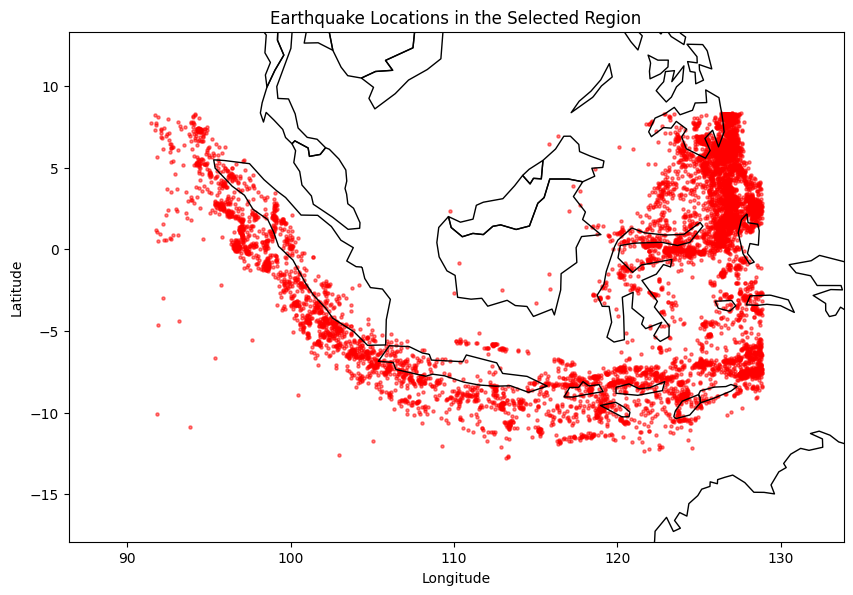

In [152]:
# Plot map of investigating region
df_geo = gpd.GeoDataFrame(data_modified, geometry = gpd.points_from_xy(df.longitude, df.latitude))

# Load the world map (downloaded from Natural Earth)
# Make sure you point this to the correct file location where the shapefiles are extracted
world = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Defining the extent (bounding box) of the map region 
min_lon, max_lon = 91.406 - 5, 128.848 + 5  # Longitude range
min_lat, max_lat = -12.897 - 5, 8.32 + 5 # Latitude range

# Plot the selected region
fig, ax = plt.subplots(figsize=(10, 8))
world.boundary.plot(ax=ax, linewidth=1, color='black')
df_geo.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.5)

# Set xlim and ylim to focus on the specifc area we have chosen
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)

# Specify labels for x and y
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.title('Earthquake Locations in the Selected Region')
plt.show()

## Plotting a graph of the number of earthquakes over time

C:\Users\robin\AppData\Local\Temp\ipykernel_30484\2952785249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modified.loc[:, 'year'] = data_modified['time'].dt.year


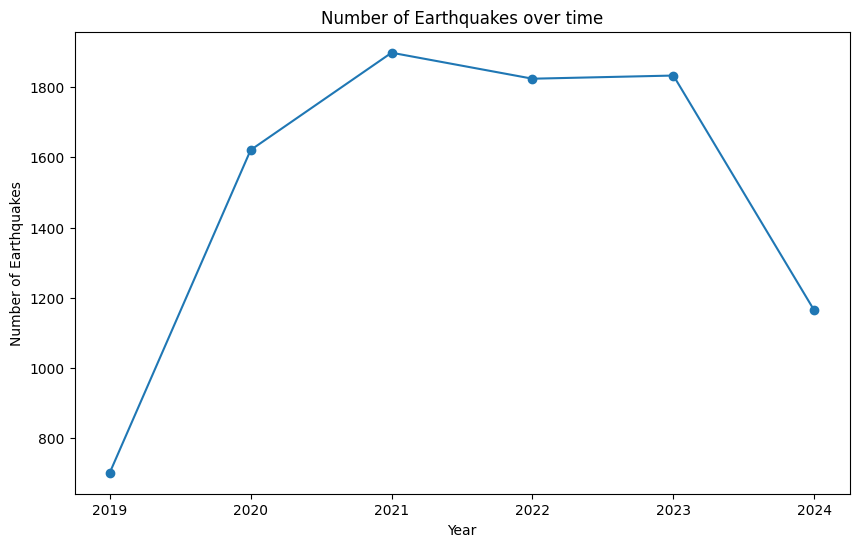

In [153]:
# Group the activities by year and count the number of earthquakes
data_modified.loc[:, 'year'] = data_modified['time'].dt.year

earthquakes_per_year = data_modified.groupby('year').size()

# Plot the number of earthquakes over time
plt.figure(figsize=(10,6))
plt.plot(earthquakes_per_year.index, earthquakes_per_year.values, marker='o')
plt.title('Number of Earthquakes over time')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.show()

## Ploting a graph of the seasonal effect to number of earthquakes

C:\Users\robin\AppData\Local\Temp\ipykernel_30484\3913250851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modified.loc[:, 'month'] = data_modified['time'].dt.month
C:\Users\robin\AppData\Local\Temp\ipykernel_30484\3913250851.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modified['season'] = data_modified['month'].map(month_to_season)


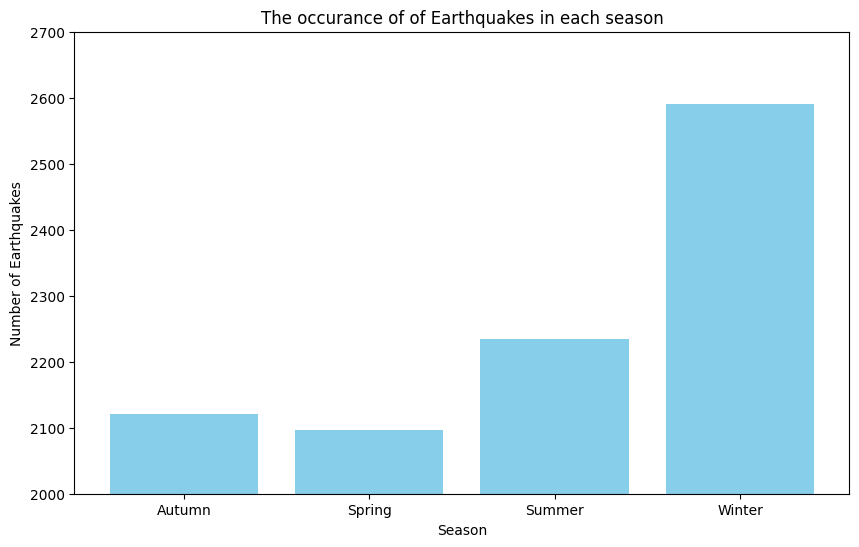

In [154]:
# Group the activities by month and count the number of earthquakes
data_modified.loc[:, 'month'] = data_modified['time'].dt.month

# A dictionary to map months to seasons
month_to_season = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
}

data_modified['season'] = data_modified['month'].map(month_to_season)

earthquakes_per_season = data_modified.groupby('season').size()

# Plot the number of earthquakes over time
plt.figure(figsize=(10,6))
plt.bar(earthquakes_per_season.index, earthquakes_per_season.values, color='skyblue')
plt.title('The occurance of of Earthquakes in each season')
plt.xlabel('Season')
plt.ylabel('Number of Earthquakes')
plt.ylim(2000, 2700)
plt.show()

## Plotting the distribution of the magnitude of the earthquakes

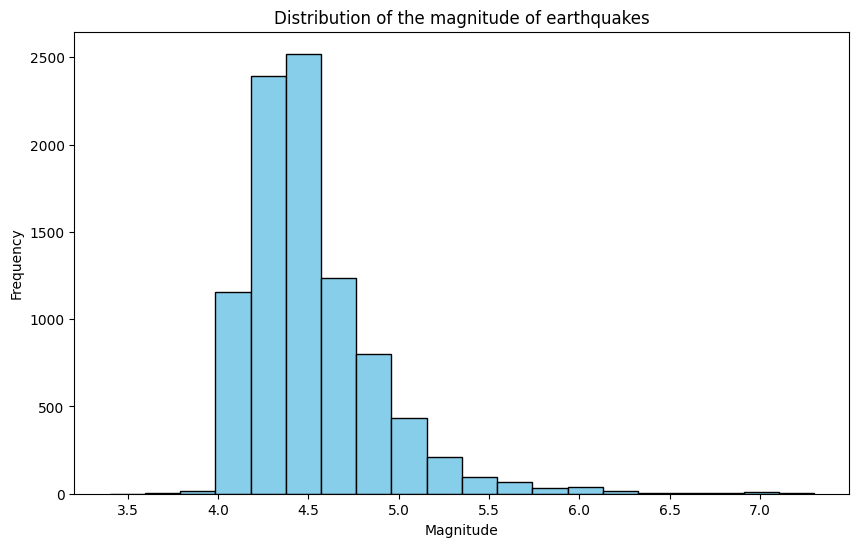

count    9042.000000
mean        4.495211
std         0.377416
min         3.400000
25%         4.300000
50%         4.400000
75%         4.600000
max         7.300000
Name: mag, dtype: float64


In [155]:
# Plot the distribution of the magnitude of earthquakes
plt.figure(figsize=(10,6))
plt.hist(data_modified['mag'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of the magnitude of earthquakes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

# Descriptive statistics of magnitudes
print(df['mag'].describe())

## Distribution Fitting for the dataset

In [156]:
# Create an extra column in the dataframe for the inter arrival times
data_modified['inter_arrival_time'] = data_modified['time'].diff().dt.total_seconds() / 60
x = data_modified['inter_arrival_time'].dropna() # Drop off all the null rows
x.describe()

C:\Users\robin\AppData\Local\Temp\ipykernel_30484\1123385502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_modified['inter_arrival_time'] = data_modified['time'].diff().dt.total_seconds() / 60


count    9041.000000
mean      290.895807
std       340.012314
min         0.033100
25%        57.252367
50%       174.926467
75%       400.201433
max      3725.878900
Name: inter_arrival_time, dtype: float64

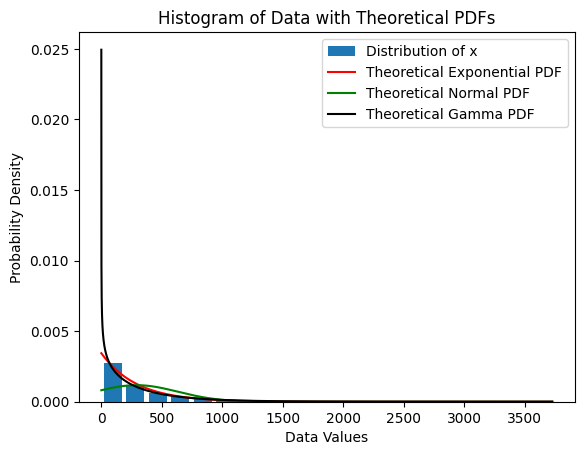

In [157]:
'''
Plotting the histogram of the data and compare the fitted distribution of our 'x' to 3 probability distribution function: Exponential distribution, Normal Distribution, and Gamma distribution.
Then we check which distributions is a good fit to the distribution of x - interarrival times between each earthquakes
'''

# Using the method of moments the parameters for an Exponential, Normal, and Gamma distribution are estimated
M1 = np.mean(x)
M2 = np.mean(x**2)

# Initializing the Exponential Distribution
lamEst = 1 / M1 # lambda = 1 / E[X], formula of lambda
estExpDist = stats.expon(scale=1/lamEst)

# Initializating the Normal Distribution
muEst = M1 # mu = M1 (= estimation of x), E[X] = mu
sigmaEst = np.sqrt(M2 - M1**2) # E[X**2] = sigma**2 + mu**2 -> sigma**2 = E[X**2] - mu**2
estNormDist = stats.norm(muEst, sigmaEst)

# Initializing the Gamma Distribution
# E[X] = alpha / beta, Var[X] = alpha / beta**2 -> E[X**2] = alpha(alpha + 1) / beta**2.
# M1 = alpha / beta, M2 = alpha(alpha + 1) / beta**2
alphaEst = M1**2 / (M2 - M1**2) # Alpha is estimated as M1**2 / (M2 - M1**2)
betaEst = M1 / (M2 - M1**2) # Beta is estimated as M1 / (M2 - M1**2)
estGammaDist = stats.gamma(alphaEst, scale=1/betaEst)

# Creating array serving as x-coordinates for plotting the theoretical PDF's
# Use of min(x) and max(x) to ensure that xs has the same range as x
xs = np.arange(min(x), max(x), 0.1)
# Visualising the distribution of x together with the predefined distribution to check
# which distribution aligns the best with the distribution of the data set
plt.figure()
# Plot distribution of X as a blue histogram
plt.hist(x, rwidth = 0.8, bins=20, density=True, label = 'Distribution of x')
# Plot the theoretical exponential PDF as a solid red line
plt.plot(xs, estExpDist.pdf(xs), 'r', label = 'Theoretical Exponential PDF')
# Plot the theoretical normal PDF as a solid green line
plt.plot(xs, estNormDist.pdf(xs), 'g', label = 'Theoretical Normal PDF')
# Plot the theoretical gamma PDF as a solid black line
plt.plot(xs, estGammaDist.pdf(xs), 'black', label = 'Theoretical Gamma PDF')
plt.title('Histogram of Data with Theoretical PDFs')
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

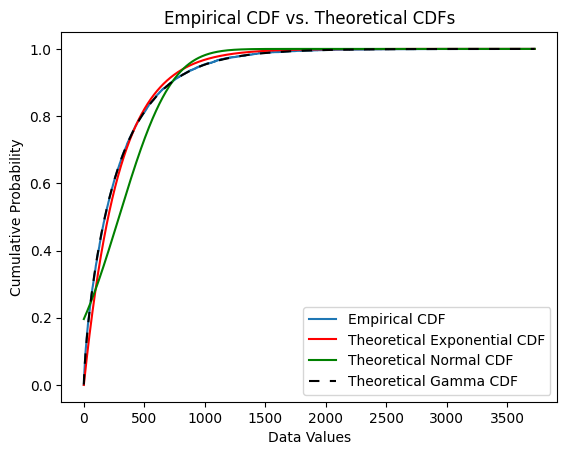

In [158]:
'''
Plotting the histogram of the data and compare the fitted distribution of our 'x' to 3 continuous distribution function: Exponential distribution, Normal Distribution, and Gamma distribution.
Then we check which distributions is a good fit to the emperical continuous distribution function
'''
# Sorting is necessary for plotting a CDF. These sorted values are used as the x-coordinates for the step plot of the empirical CDF
xs2 = np.sort(x)
# ys is an array of cumulative probabilities and it matches the number of data points in x because it makes use of the len(x) function
# Each value in ys represent the portion of data points less than or equal to the corresponding value of xs2
ys = np.arange(1/len(x), 1 + 1/len(x), 1/len(x))
# Empirical distribution sampling to visualise which distribution aligns the best with the distribution of the data set
# Plot the empirical CDF as a solid blue line
plt.step(xs2, ys, where='post', label = 'Empirical CDF')
# Plot the theoretical exponential CDF as a solid red line
plt.plot(xs2, estExpDist.cdf(xs2), 'r', label = 'Theoretical Exponential CDF')
# Plot the theoretical normal CDF as a solid green line
plt.plot(xs2, estNormDist.cdf(xs2), 'g', label = 'Theoretical Normal CDF')
# Plot the theoretical gamma CDF as a dashed black line to make it clearer
plt.plot(xs2, estGammaDist.cdf(xs2), 'black', linestyle='--', dashes=(5,5), label = 'Theoretical Gamma CDF')
plt.title('Empirical CDF vs. Theoretical CDFs')
plt.xlabel('Data Values')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

In [159]:
# Perform the Kolmogorov-Smirnov test as a goodness of fit test
# H0: The empirical distribution function tends to the chosen distribution function of the random variable
print("ktest Exp:", stats.kstest(x, estExpDist.cdf))
print("ktest Norm:", stats.kstest(x, estNormDist.cdf))
print("ktest Gamma:", stats.kstest(x, estGammaDist.cdf))

ktest Exp: KstestResult(statistic=np.float64(0.07460532950794346), pvalue=np.float64(3.2906706915158227e-44), statistic_location=np.float64(62.440266666666666), statistic_sign=np.int8(1))
ktest Norm: KstestResult(statistic=np.float64(0.1961386185166058), pvalue=np.float64(3.233221763609271e-305), statistic_location=np.float64(0.0331), statistic_sign=np.int8(-1))
ktest Gamma: KstestResult(statistic=np.float64(0.007171000656235882), pvalue=np.float64(0.7383481182496745), statistic_location=np.float64(2.4821), statistic_sign=np.int8(-1))


## Distribution fitting for the 2 types of Earthquakes


### Probability of an arbitrary earthquake that has magnitude less than 5

In [203]:
# Calculating probability of an arbitrary earthquake being a type 2 earthquake
# By taking the mean value of the boolean mask
prob_type2 = np.mean(data_modified['mag'] < 5)

print(prob_type2)

0.898252598982526


### Distribution fitting for type 1 Earthquakes

In [161]:
# Create an extra column in the dataframe for the inter arrival times of type 1 data
type1['inter_arrival_time'] = type1['time'].diff().dt.total_seconds() / 60
x_type1 = type1['inter_arrival_time'].dropna() # Drop off all the null rows
x_type1.describe()

C:\Users\robin\AppData\Local\Temp\ipykernel_30484\834352433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type1['inter_arrival_time'] = type1['time'].diff().dt.total_seconds() / 60


count      919.000000
mean      2849.640568
std       3456.095372
min          0.738150
25%        405.083758
50%       1744.491317
75%       4059.228767
max      24818.368133
Name: inter_arrival_time, dtype: float64

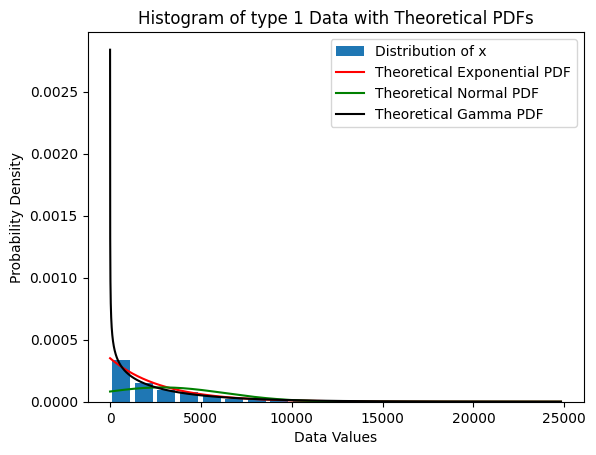

In [162]:
'''
Plotting the histogram of type 1 x(which is the interarrival times between each earthquakes) and compare the fitted distribution of our 'x' to 3 probability distribution function: Exponential distribution, Normal Distribution, and Gamma distribution.
Then we check which distributions is a good fit to the distribution of type 1 x
'''

# Using the method of moments the parameters for an exponential, normal, and gamma distribution are estimated
M1_type1 = np.mean(x_type1)
M2_type1 = np.mean(x_type1**2)

# Initializing the Exponential Distribution
lamEst_type1 = 1 / M1_type1 # lambda = 1 / E[X], formula of lambda
estExpDist_type1 = stats.expon(scale=1/lamEst_type1)

# Initializating the Normal Distribution
muEst_type1 = M1_type1 # mu = M1 (= estimation of x), E[X] = mu
sigmaEst_type1 = np.sqrt(M2_type1 - M1_type1**2) # E[X**2] = sigma**2 + mu**2 -> sigma**2 = E[X**2] - mu**2
estNormDist_type1 = stats.norm(muEst_type1, sigmaEst_type1)

# Initializing the Gamma Distribution
# E[X] = alpha / beta, Var[X] = alpha / beta**2 -> E[X**2] = alpha(alpha + 1) / beta**2.
# M1 = alpha / beta, M2 = alpha(alpha + 1) / beta**2
alphaEst_type1 = M1_type1**2 / (M2_type1 - M1_type1**2) # Alpha is estimated as M1**2 / (M2 - M1**2)
betaEst_type1 = M1_type1 / (M2_type1 - M1_type1**2) # Beta is estimated as M1 / (M2 - M1**2)
estGammaDist_type1 = stats.gamma(alphaEst_type1, scale=1/betaEst_type1)

# Creating array serving as x-coordinates for plotting the theoretical PDF's
# Use of min(x) and max(x) to ensure that xs has the same range as x
xs_type1 = np.arange(min(x_type1), max(x_type1), 0.1)
# Visualising the distribution of x together with the predefined distribution to check
# which distribution aligns the best with the distribution of the data set
plt.figure()
# Plot distribution of X as a blue histogram
plt.hist(x_type1, rwidth = 0.8, bins=20, density=True, label = 'Distribution of x')
# Plot the theoretical exponential PDF as a solid red line
plt.plot(xs_type1, estExpDist_type1.pdf(xs_type1), 'r', label = 'Theoretical Exponential PDF')
# Plot the theoretical normal PDF as a solid green line
plt.plot(xs_type1, estNormDist_type1.pdf(xs_type1), 'g', label = 'Theoretical Normal PDF')
# Plot the theoretical gamma PDF as a solid black line
plt.plot(xs_type1, estGammaDist_type1.pdf(xs_type1), 'black', label = 'Theoretical Gamma PDF')
plt.title('Histogram of type 1 Data with Theoretical PDFs')
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

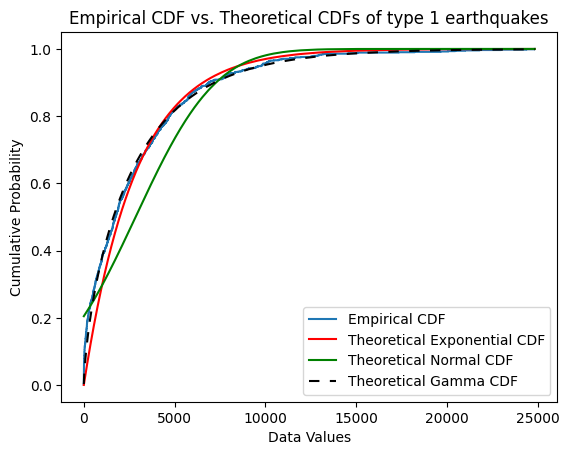

In [163]:
'''
Plotting the line plot of the empirical CDF of type 1 x(which is the interarrival times between each earthquakes) and compare the fitted distribution of our 'x' to 3 continuous distribution function: Exponential distribution, Normal Distribution, and Gamma distribution.
Then we check which distributions is a good fit to the emperical continuous distribution function
'''
# Sorting is necessary for plotting a CDF. These sorted values are used as the x-coordinates for the step plot of the empirical CDF
xs2_type1 = np.sort(x_type1)
# ys is an array of cumulative probabilities and it matches the number of data points in x because it makes use of the len(x) function
# Each value in ys represent the portion of data points less than or equal to the corresponding value of xs2
ys_type1 = np.arange(1/len(x_type1), 1 + 1/len(x_type1), 1/len(x_type1))
# Empirical distribution sampling to visualise which distribution aligns the best with the distribution of the data set
# Plot the empirical CDF as a solid blue line
plt.step(xs2_type1, ys_type1, where='post', label = 'Empirical CDF')
# Plot the theoretical exponential CDF as a solid red line
plt.plot(xs2_type1, estExpDist_type1.cdf(xs2_type1), 'r', label = 'Theoretical Exponential CDF')
# Plot the theoretical normal CDF as a solid green line
plt.plot(xs2_type1, estNormDist_type1.cdf(xs2_type1), 'g', label = 'Theoretical Normal CDF')
# Plot the theoretical gamma CDF as a dashed black line to make it clearer
plt.plot(xs2_type1, estGammaDist_type1.cdf(xs2_type1), 'black', linestyle='--', dashes=(5,5), label = 'Theoretical Gamma CDF')
plt.title('Empirical CDF vs. Theoretical CDFs of type 1 earthquakes')
plt.xlabel('Data Values')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

In [164]:
# Perform the Kolmogorov-Smirnov test as a goodness of fit test
# H0: the empirical distribution function tends to the chosen distribution function of the random variable
print("ktest Exp:", stats.kstest(x_type1, estExpDist_type1.cdf))
print("ktest Norm:", stats.kstest(x_type1, estNormDist_type1.cdf))
print("ktest Gamma:", stats.kstest(x_type1, estGammaDist_type1.cdf))

ktest Exp: KstestResult(statistic=np.float64(0.12789982962698873), pvalue=np.float64(1.4498411242998488e-13), statistic_location=np.float64(250.9183833333333), statistic_sign=np.int8(1))
ktest Norm: KstestResult(statistic=np.float64(0.20475356315806137), pvalue=np.float64(2.9184718962544368e-34), statistic_location=np.float64(0.73815), statistic_sign=np.int8(-1))
ktest Gamma: KstestResult(statistic=np.float64(0.06023975008023046), pvalue=np.float64(0.0024281838158709645), statistic_location=np.float64(47.05323333333333), statistic_sign=np.int8(1))


### Distribution fitting with type 2 data

In [165]:
# Create an extra column in the dataframe for the inter arrival times of type 2 data
type2['inter_arrival_time'] = type2['time'].diff().dt.total_seconds() / 60
x_type2 = type2['inter_arrival_time'].dropna() # Drop off all the null rows
x_type2.describe()

C:\Users\robin\AppData\Local\Temp\ipykernel_30484\2575134362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type2['inter_arrival_time'] = type2['time'].diff().dt.total_seconds() / 60


count    8121.000000
mean      323.727129
std       372.539001
min         0.033100
25%        66.749217
50%       198.598567
75%       444.269533
max      3725.878900
Name: inter_arrival_time, dtype: float64

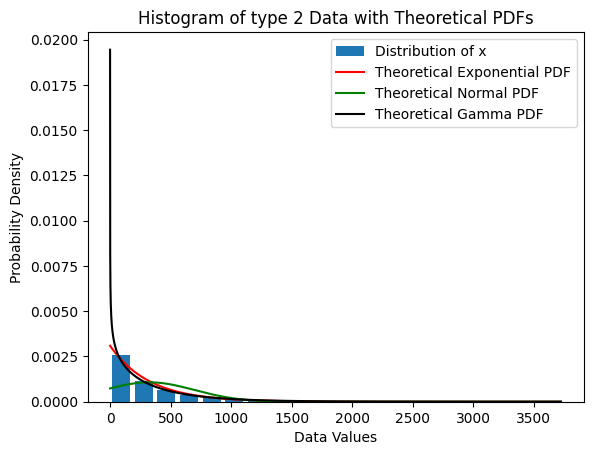

In [166]:
'''
Plotting the histogram of type 2 x(which is the interarrival times between each earthquakes) and compare the fitted distribution of our 'x' to 3 probability distribution function: Exponential distribution, Normal Distribution, and Gamma distribution.
Then we check which distributions is a good fit to the distribution of type 2 x
'''

# Using the method of moments the parameters for an exponential, normal, and gamma distribution are estimated
M1_type2 = np.mean(x_type2)
M2_type2 = np.mean(x_type2**2)

# Initializing the Exponential Distribution
lamEst_type2 = 1 / M1_type2 # lambda = 1 / E[X], formula of lambda
estExpDist_type2 = stats.expon(scale=1/lamEst_type2)

# Initializating the Normal Distribution
muEst_type2 = M1_type2 # mu = M1 (= estimation of x), E[X] = mu
sigmaEst_type2 = np.sqrt(M2_type2 - M1_type2**2) # E[X**2] = sigma**2 + mu**2 -> sigma**2 = E[X**2] - mu**2
estNormDist_type2 = stats.norm(muEst_type2, sigmaEst_type2)

# Initializing the Gamma Distribution
# E[X] = alpha / beta, Var[X] = alpha / beta**2 -> E[X**2] = alpha(alpha + 1) / beta**2.
# M1 = alpha / beta, M2 = alpha(alpha + 1) / beta**2
alphaEst_type2 = M1_type2**2 / (M2_type2 - M1_type2**2) # Alpha is estimated as M1**2 / (M2 - M1**2)
betaEst_type2 = M1_type2 / (M2_type2 - M1_type2**2) # Beta is estimated as M1 / (M2 - M1**2)
estGammaDist_type2 = stats.gamma(alphaEst_type2, scale=1/betaEst_type2)

# Creating array serving as x-coordinates for plotting the theoretical PDF's
# Use of min(x) and max(x) to ensure that xs has the same range as x
xs_type2 = np.arange(min(x_type2), max(x_type2), 0.1)
# Visualising the distribution of x together with the predefined distribution to check
# which distribution aligns the best with the distribution of the data set
plt.figure()
# Plot distribution of X as a blue histogram
plt.hist(x_type2, rwidth = 0.8, bins=20, density=True, label = 'Distribution of x')
# Plot the theoretical exponential PDF as a solid red line
plt.plot(xs_type2, estExpDist_type2.pdf(xs_type2), 'r', label = 'Theoretical Exponential PDF')
# Plot the theoretical normal PDF as a solid green line
plt.plot(xs_type2, estNormDist_type2.pdf(xs_type2), 'g', label = 'Theoretical Normal PDF')
# Plot the theoretical gamma PDF as a solid black line
plt.plot(xs_type2, estGammaDist_type2.pdf(xs_type2), 'black', label = 'Theoretical Gamma PDF')
plt.title('Histogram of type 2 Data with Theoretical PDFs')
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

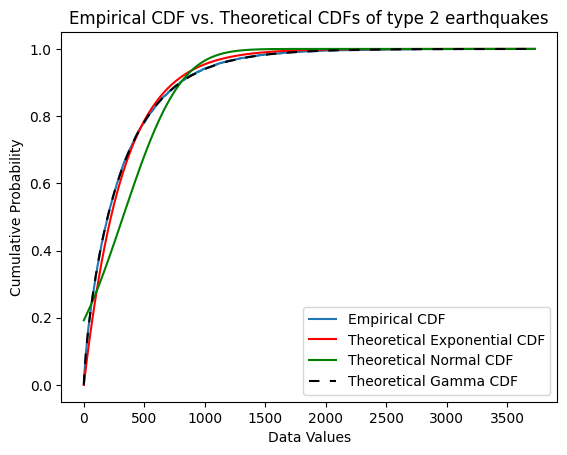

In [167]:
'''
Plotting the line plot of the ECDF of type 2 x(which is the interarrival times between each earthquakes) and compare the fitted distribution of our 'x' to 3 continuous distribution function: 
Exponential distribution, Normal Distribution, and Gamma distribution.
Then we check which distributions is a good fit to the emperical continuous distribution function
'''
# Sorting is necessary for plotting a CDF. These sorted values are used as the x-coordinates for the step plot of the empirical CDF
xs2_type2 = np.sort(x_type2)
# ys is an array of cumulative probabilities and it matches the number of data points in x because it makes use of the len(x) function
# Each value in ys represent the portion of data points less than or equal to the corresponding value of xs2
ys_type2 = np.arange(1/len(x_type2), 1 + 1/len(x_type2), 1/len(x_type2))[:len(x_type2)]
# Empirical distribution sampling to visualise which distribution aligns the best with the distribution of the data set
# Plot the empirical CDF as a solid blue line
plt.step(xs2_type2, ys_type2, where='post', label = 'Empirical CDF')
# Plot the theoretical exponential CDF as a solid red line
plt.plot(xs2_type2, estExpDist_type2.cdf(xs2_type2), 'r', label = 'Theoretical Exponential CDF')
# Plot the theoretical normal CDF as a solid green line
plt.plot(xs2_type2, estNormDist_type2.cdf(xs2_type2), 'g', label = 'Theoretical Normal CDF')
# Plot the theoretical gamma CDF as a dashed black line to make it clearer
plt.plot(xs2_type2, estGammaDist_type2.cdf(xs2_type2), 'black', linestyle='--', dashes=(5,5), label = 'Theoretical Gamma CDF')
plt.title('Empirical CDF vs. Theoretical CDFs of type 2 earthquakes')
plt.xlabel('Data Values')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

In [168]:
# Perform the Kolmogorov-Smirnov test as a goodness of fit test for type 2 data
# H0: the empirical distribution function tends to the chosen distribution function of the random variable
print("ktest Exp:", stats.kstest(x_type2, estExpDist_type2.cdf))
print("ktest Norm:", stats.kstest(x_type2, estNormDist_type2.cdf))
print("ktest Gamma:", stats.kstest(x_type2, estGammaDist_type2.cdf))

ktest Exp: KstestResult(statistic=np.float64(0.06570479096713569), pvalue=np.float64(6.329777916347597e-31), statistic_location=np.float64(62.43241666666667), statistic_sign=np.int8(1))
ktest Norm: KstestResult(statistic=np.float64(0.19244003278901378), pvalue=np.float64(6.817730879666909e-264), statistic_location=np.float64(0.0331), statistic_sign=np.int8(-1))
ktest Gamma: KstestResult(statistic=np.float64(0.00685451344107735), pvalue=np.float64(0.837397817530792), statistic_location=np.float64(2.514816666666667), statistic_sign=np.int8(-1))


# Stochastic Simulation

In [169]:
T = 365*24*60 # Simulation is done for next year and is converted to minutes for the simulation

nrRuns = 20000 # Number of runs, used to define how many simulations are done before calculating the statistics and plotting

def simEarthquakes(alpha, beta, T):
    Nt = 0 # Counting the number of earthquakes
    # Distribution for the inter arrival times between earthquakes. As found previously, this follows a Gamma distribution
    interArrDist = stats.gamma(alpha, scale=1/beta) 
    t = interArrDist.rvs() # Time variable
    
    # The simulation is done for one year, so as long as the time variable is smaller than one year the simulation will continue
    while t < T:
        Nt += 1 # An earthquake occured, so counter raised by one
        t += interArrDist.rvs() # Time variable is raised by the inter arrival time, which distribution is defined above
        
    return Nt # Return the number of earthquakes that occured in the next year (365 days)

## Method 1: Sampling over the two types of earthquakes

### Simulated type 1 data

In [170]:
sim_type1 = [simEarthquakes(alphaEst_type1, betaEst_type1, T) for _ in range(nrRuns)]
sample_mean_type1 = np.mean(sim_type1)
sample_std_type1 = np.std(sim_type1)

print(f'Mean N1(T): {sample_mean_type1}')
print(f'Standard Deviation N1(T): {sample_std_type1}')

# Create an confidence interval for the mean of N1(T) using alpha = 0.05 resulting in a z-statistic of 1.96
# Since the standard deviation is unknown and replaced by a sample standard deviation should we actually use the t-statistic
# instead of the z-statistic. However, because we have so much data it is fine to use the z-statistic
halfwidth_type1 = 1.96 * sample_std_type1 / np.sqrt(nrRuns)
print(f'Confidence interval mean N1(T): {(sample_mean_type1 - halfwidth_type1, sample_mean_type1 + halfwidth_type1)}')
print(f'Confidence interval mean N1(T): {sample_mean_type1} +/- {halfwidth_type1}')

Mean N1(T): 184.96
Standard Deviation N1(T): 15.295044949263797
Confidence interval mean N1(T): (np.float64(181.9621711899443), np.float64(187.9578288100557))
Confidence interval mean N1(T): 184.96 +/- 2.997828810055704


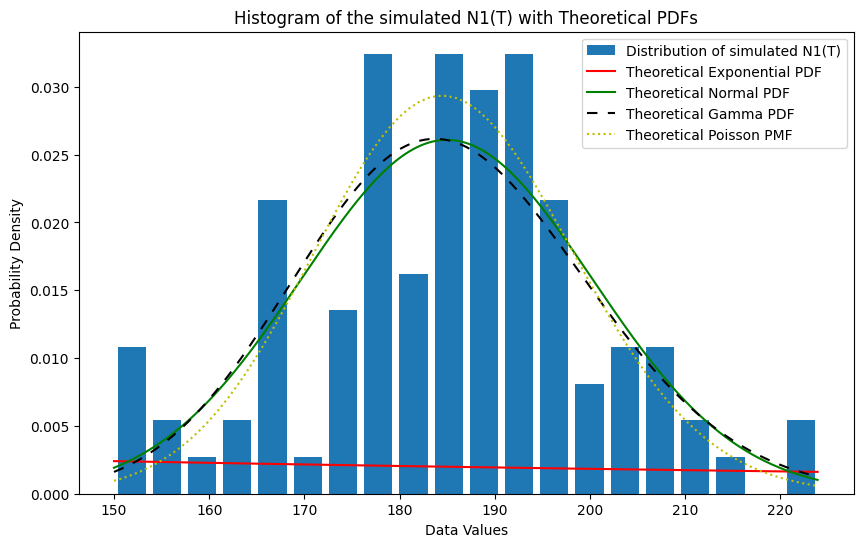

In [171]:
'''
Plotting the histogram of simulated number of type 1 earthquakes and compare the fitted distribution of this to 4 probability distribution function:
Exponential distribution, Normal Distribution, Gamma Distribution, and Poisson distribution.
Then we check which distributions is a good fit to the distribution of number of type 1 earthquakes (N1(T))
'''

# Using the method of moments the parameters for an exponential, normal, and gamma distribution are estimated
M1_type1_NT = sample_mean_type1
M2_type1_NT = np.mean(np.square(sim_type1))

# Initializing the Exponential Distribution
lamEst_type1_NT = 1 / M1_type1_NT # lambda = 1 / E[X], formula of lambda
estExpDist_type1_NT = stats.expon(scale=1/lamEst_type1_NT)

# Initializating the Normal Distribution
muEst_type1_NT = M1_type1_NT # mu = M1 (= estimation of x), E[X] = mu
sigmaEst_type1_NT = np.sqrt(M2_type1_NT - M1_type1_NT**2) # E[X**2] = sigma**2 + mu**2 -> sigma**2 = E[X**2] - mu**2
estNormDist_type1_NT = stats.norm(muEst_type1_NT, sigmaEst_type1_NT)

# Initializing the Gamma Distribution
# E[X] = alpha / beta, Var[X] = alpha / beta**2 -> E[X**2] = alpha(alpha + 1) / beta**2.
# M1 = alpha / beta, M2 = alpha(alpha + 1) / beta**2
alphaEst_type1_NT = M1_type1_NT**2 / (M2_type1_NT - M1_type1_NT**2) # Alpha is estimated as M1**2 / (M2 - M1**2)
betaEst_type1_NT = M1_type1_NT / (M2_type1_NT - M1_type1_NT**2) # Beta is estimated as M1 / (M2 - M1**2)
estGammaDist_type1_NT = stats.gamma(alphaEst_type1_NT, scale=1/betaEst_type1_NT)

# Initializing the Poisson Distribution
# E[X] = lambda
# Therefore, lambda could be estimated as M1
lamEst_Poi_type1_NT = M1_type1_NT
estPoisDist_type1_NT = stats.poisson(lamEst_Poi_type1_NT)

# Creating array serving as x-coordinates for plotting the theoretical PDF's/PMF
# Use of min() and max() to ensure that xs has the same range as NrType2
xs_type1_NT_continuous = np.arange(min(sim_type1), max(sim_type1), 0.1) # for PDFs
xs_type1_NT_discrete = np.arange(min(sim_type1), max(sim_type1) + 1) # for PMF, using step size 1

# Visualising the distribution of N1(T) together with the predefined distribution to check
# which distribution aligns the best with the distribution of the data set
plt.figure(figsize=(10,6))
# Plot distribution of N1(T) as a blue histogram
plt.hist(sim_type1, rwidth = 0.8, bins=20, density=True, label = 'Distribution of simulated N1(T)')
# Plot the theoretical Exponential PDF as a solid red line
plt.plot(xs_type1_NT_continuous, estExpDist_type1_NT.pdf(xs_type1_NT_continuous), 'r', label = 'Theoretical Exponential PDF')
# Plot the theoretical Normal PDF as a solid green line
plt.plot(xs_type1_NT_continuous, estNormDist_type1_NT.pdf(xs_type1_NT_continuous), 'g', label = 'Theoretical Normal PDF')
# Plot the theoretical Gamma PDF as a dasher black line
plt.plot(xs_type1_NT_continuous, estGammaDist_type1_NT.pdf(xs_type1_NT_continuous), 'black', linestyle='--', dashes=(5,5), label = 'Theoretical Gamma PDF')
# Plot the theoretical Poisson PMF as a dotted yellow line
plt.plot(xs_type1_NT_discrete, estPoisDist_type1_NT.pmf(xs_type1_NT_discrete), 'y', linestyle=':', label = 'Theoretical Poisson PMF')
plt.title('Histogram of the simulated N1(T) with Theoretical PDFs')
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

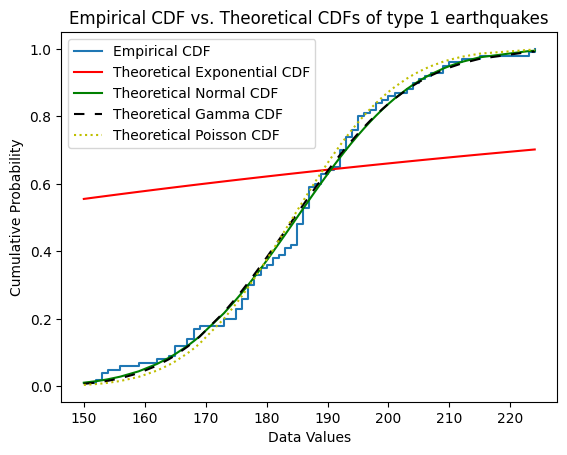

In [172]:
'''
Plotting the Empirical CDF of simulated N1(T) and compare to 4 CDFs: 
Exponential distribution, Normal distribution, Gamma distribution, and Poisson distribution.
Then we check which distributions is a good fit to the emperical CDF of N1(T)
'''
# Sorting is necessary for plotting a CDF. These sorted values are used as the x-coordinates for the step plot of the empirical CDF
xs2_type1_NT = np.sort(sim_type1)
# ys is an array of cumulative probabilities and it matches the number of data points in x because it makes use of the len(x) function
# Each value in ys represent the portion of data points less than or equal to the corresponding value of xs2
ys_type1_NT = np.arange(1/len(sim_type1), 1 + 1/len(sim_type1), 1/len(sim_type1))
# Empirical distribution sampling to visualise which distribution aligns the best with the distribution of the data set
# Plot the empirical CDF as a solid blue line
plt.step(xs2_type1_NT, ys_type1_NT, where='post', label = 'Empirical CDF')
# Plot the theoretical exponential CDF as a solid red line
plt.plot(xs2_type1_NT, estExpDist_type1_NT.cdf(xs2_type1_NT), 'r', label = 'Theoretical Exponential CDF')
# Plot the theoretical normal CDF as a solid green line
plt.plot(xs2_type1_NT, estNormDist_type1_NT.cdf(xs2_type1_NT), 'g', label = 'Theoretical Normal CDF')
# Plot the theoretical gamma CDF as a dashed black line to make it clearer
plt.plot(xs2_type1_NT, estGammaDist_type1_NT.cdf(xs2_type1_NT), 'black', linestyle='--', dashes=(5,5), label = 'Theoretical Gamma CDF')
# Plot the theoretical poisson CDF as a dotted yellow line 
plt.plot(xs2_type1_NT, estPoisDist_type1_NT.cdf(xs2_type1_NT), 'y', linestyle=':', label = 'Theoretical Poisson CDF')
plt.title('Empirical CDF vs. Theoretical CDFs of type 1 earthquakes')
plt.xlabel('Data Values')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

In [173]:
# Perform the Kolmogorov-Smirnov test as a goodness of fit test for N1(T)
# H0: the empirical distribution function tends to the chosen distribution function of N1(T)
print("ktest Exp:", stats.kstest(sim_type1, estExpDist_type1_NT.cdf))
print("ktest Norm:", stats.kstest(sim_type1, estNormDist_type1_NT.cdf))
print("ktest Gamma:", stats.kstest(sim_type1, estGammaDist_type1_NT.cdf))
print("ktest Poisson:", stats.kstest(sim_type1, estPoisDist_type1_NT.cdf))

ktest Exp: KstestResult(statistic=np.float64(0.5555804183948638), pvalue=np.float64(1.4347151006857895e-29), statistic_location=np.int64(150), statistic_sign=np.int8(-1))
ktest Norm: KstestResult(statistic=np.float64(0.08104332305519962), pvalue=np.float64(0.5016383309910045), statistic_location=np.int64(185), statistic_sign=np.int8(-1))
ktest Gamma: KstestResult(statistic=np.float64(0.09203971149884399), pvalue=np.float64(0.3440439519845796), statistic_location=np.int64(185), statistic_sign=np.int8(-1))
ktest Poisson: KstestResult(statistic=np.float64(0.10071308344971658), pvalue=np.float64(0.24546877138380385), statistic_location=np.int64(185), statistic_sign=np.int8(-1))


### Simulated type 2 data


In [174]:
sim_type2 = [simEarthquakes(alphaEst_type2, betaEst_type2, T) for _ in range(nrRuns)]
# Calculate sample mean and sample standard deviation
sample_mean_type2 = np.mean(sim_type2)
sample_std_type2 = np.std(sim_type2)

print(f'Mean N2(T): {sample_mean_type2}')
print(f'Standard Deviation N2(T): {sample_std_type2}')

# Create an confidence interval for the mean of N2(T) using alpha = 0.05 resulting in a z-statistic of 1.96
# Since the standard deviation is unknown and replaced by a sample standard deviation should we actually use the t-statistic
# instead of the z-statistic. However, because we have so much data it is fine to use the z-statistic
halfwidth_type2 = 1.96 * sample_std_type2 / np.sqrt(nrRuns)
print(f'Confidence interval mean N2(T): {(sample_mean_type2 - halfwidth_type2, sample_mean_type2 + halfwidth_type2)}')
print(f'Confidence interval mean N2(T): {sample_mean_type2} +/- {halfwidth_type2}')

Mean N2(T): 1624.8
Standard Deviation N2(T): 53.113086899558006
Confidence interval mean N2(T): (np.float64(1614.3898349676865), np.float64(1635.2101650323134))
Confidence interval mean N2(T): 1624.8 +/- 10.410165032313369


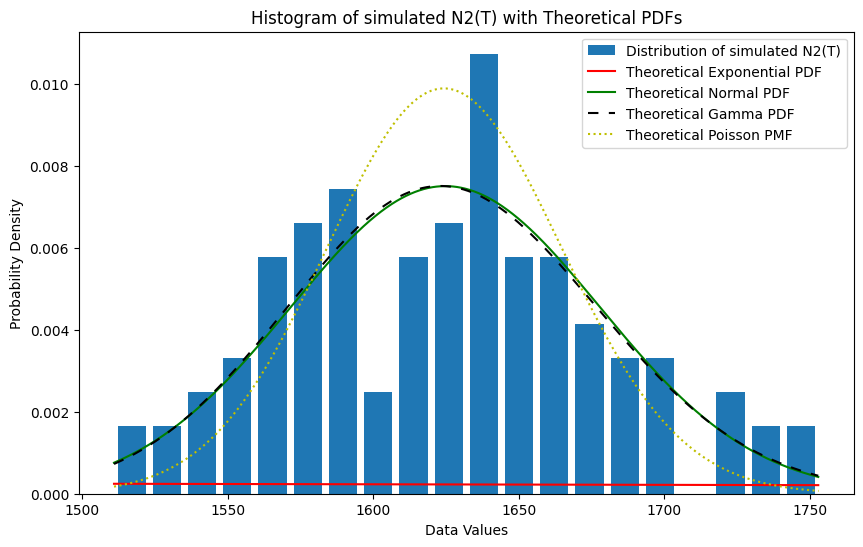

In [175]:
'''
Plotting the histogram of simulated number of type 2 earthquakes and compare the fitted distribution of this to 4 probability distribution function:
Exponential distribution, Normal Distribution, Gamma Distribution, and Poisson distribution.
Then we check which distributions is a good fit to the distribution of number of type 2 earthquakes (N2(T))
'''

# Using the method of moments the parameters for an exponential, normal, and gamma distribution are estimated
M1_type2_NT = sample_mean_type2
M2_type2_NT = np.mean(np.square(sim_type2))

# Initializing the Exponential Distribution
lamEst_type2_NT = 1 / M1_type2_NT # lambda = 1 / E[X], formula of lambda
estExpDist_type2_NT = stats.expon(scale=1/lamEst_type2_NT)

# Initializating the Normal Distribution
muEst_type2_NT = M1_type2_NT # mu = M1 (= estimation of x), E[X] = mu
sigmaEst_type2_NT = np.sqrt(M2_type2_NT - M1_type2_NT**2) # E[X**2] = sigma**2 + mu**2 -> sigma**2 = E[X**2] - mu**2
estNormDist_type2_NT = stats.norm(muEst_type2_NT, sigmaEst_type2_NT)

# Initializing the Gamma Distribution
# E[X] = alpha / beta, Var[X] = alpha / beta**2 -> E[X**2] = alpha(alpha + 1) / beta**2.
# M1 = alpha / beta, M2 = alpha(alpha + 1) / beta**2
alphaEst_type2_NT = M1_type2_NT**2 / (M2_type2_NT - M1_type2_NT**2) # Alpha is estimated as M1**2 / (M2 - M1**2)
betaEst_type2_NT = M1_type2_NT / (M2_type2_NT - M1_type2_NT**2) # Beta is estimated as M1 / (M2 - M1**2)
estGammaDist_type2_NT = stats.gamma(alphaEst_type2_NT, scale=1/betaEst_type2_NT)

# Initializing the Poisson Distribution
# E[X] = lambda
# Therefore, lambda could be estimated as M1
lamEst_Poi_type2_NT = M1_type2_NT
estPoisDist_type2_NT = stats.poisson(lamEst_Poi_type2_NT)

# Creating array serving as x-coordinates for plotting the theoretical PDF's/PMF
# Use of min() and max() to ensure that xs has the same range as NrType2
xs_type2_NT_continuous = np.arange(min(sim_type2), max(sim_type2), 0.1) # for PDFs
xs_type2_NT_discrete = np.arange(min(sim_type2), max(sim_type2) + 1) # for PMF, using step size 1

# Visualising the distribution of N2(T) together with the predefined distribution to check
# which distribution aligns the best with the distribution of the data set
plt.figure(figsize=(10,6))
# Plot distribution of N2(T) as a blue histogram
plt.hist(sim_type2, rwidth = 0.8, bins=20, density=True, label = 'Distribution of simulated N2(T)')
# Plot the theoretical Exponential PDF as a solid red line
plt.plot(xs_type2_NT_continuous, estExpDist_type2_NT.pdf(xs_type2_NT_continuous), 'r', label = 'Theoretical Exponential PDF')
# Plot the theoretical Normal PDF as a solid green line
plt.plot(xs_type2_NT_continuous, estNormDist_type2_NT.pdf(xs_type2_NT_continuous), 'g', label = 'Theoretical Normal PDF')
# Plot the theoretical Gamma PDF as a dashed black line
plt.plot(xs_type2_NT_continuous, estGammaDist_type2_NT.pdf(xs_type2_NT_continuous), 'black', linestyle='--', dashes=(5,5), label = 'Theoretical Gamma PDF')
# Plot the theoretical Poisson PMF as a dotted yellow line
plt.plot(xs_type2_NT_discrete, estPoisDist_type2_NT.pmf(xs_type2_NT_discrete), 'y', linestyle=':', label = 'Theoretical Poisson PMF')
plt.title('Histogram of simulated N2(T) with Theoretical PDFs')
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

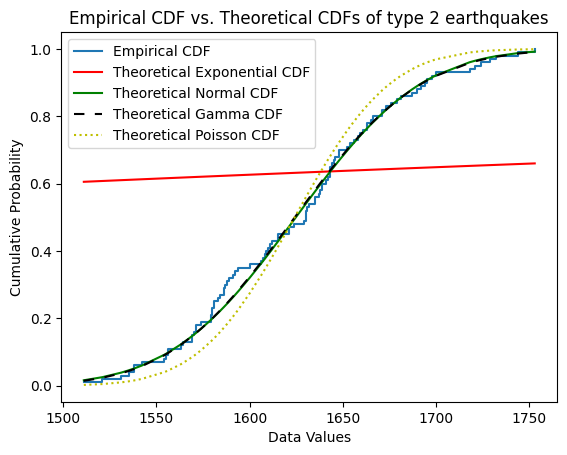

In [176]:
'''
Plotting the Empirical CDF of simulated N2(T) and compare to 4 CDFs: 
Exponential distribution, Normal distribution, Gamma distribution, and Poisson distribution.
Then we check which distributions is a good fit to the emperical CDF of N2(T)
'''

# Sorting is necessary for plotting a CDF. These sorted values are used as the x-coordinates for the step plot of the empirical CDF
xs2_type2_NT = np.sort(sim_type2)
# ys is an array of cumulative probabilities and it matches the number of data points in x because it makes use of the len() function
# Each value in ys represent the portion of data points less than or equal to the corresponding value of xs2
ys_type2_NT = np.arange(1/len(sim_type2), 1 + 1/len(sim_type2), 1/len(sim_type2))
# Empirical distribution sampling to visualise which distribution aligns the best with the distribution of the data set
# Plot the empirical CDF as a solid blue line
plt.step(xs2_type2_NT, ys_type1_NT, where='post', label = 'Empirical CDF')
# Plot the theoretical exponential CDF as a solid red line
plt.plot(xs2_type2_NT, estExpDist_type2_NT.cdf(xs2_type2_NT), 'r', label = 'Theoretical Exponential CDF')
# Plot the theoretical normal CDF as a solid green line
plt.plot(xs2_type2_NT, estNormDist_type2_NT.cdf(xs2_type2_NT), 'g', label = 'Theoretical Normal CDF')
# Plot the theoretical gamma CDF as a dashed black line to make it clearer
plt.plot(xs2_type2_NT, estGammaDist_type2_NT.cdf(xs2_type2_NT), 'black', linestyle='--', dashes=(5,5), label = 'Theoretical Gamma CDF')
# Plot the theoretical poisson CDF as a dotted yellow line 
plt.plot(xs2_type2_NT, estPoisDist_type2_NT.cdf(xs2_type2_NT), 'y', linestyle=':', label = 'Theoretical Poisson CDF')
plt.title('Empirical CDF vs. Theoretical CDFs of type 2 earthquakes')
plt.xlabel('Data Values')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

In [177]:
# Perform the Kolmogorov-Smirnov test as a goodness of fit test for N2(T)
# H0: the empirical distribution function tends to the chosen distribution function of N2(T)
print("ktest Exp:", stats.kstest(sim_type2, estExpDist_type2_NT.cdf))
print("ktest Norm:", stats.kstest(sim_type2, estNormDist_type2_NT.cdf))
print("ktest Gamma:", stats.kstest(sim_type2, estGammaDist_type2_NT.cdf))
print("ktest Poisson:", stats.kstest(sim_type2, estPoisDist_type2_NT.cdf))

ktest Exp: KstestResult(statistic=np.float64(0.605430748063412), pvalue=np.float64(1.1755124502224201e-35), statistic_location=np.int64(1511), statistic_sign=np.int8(-1))
ktest Norm: KstestResult(statistic=np.float64(0.07156407563032147), pvalue=np.float64(0.6582761141823423), statistic_location=np.int64(1592), statistic_sign=np.int8(1))
ktest Gamma: KstestResult(statistic=np.float64(0.06934735734784919), pvalue=np.float64(0.6956428189061283), statistic_location=np.int64(1592), statistic_sign=np.int8(1))
ktest Poisson: KstestResult(statistic=np.float64(0.12915564308169347), pvalue=np.float64(0.06492196211365375), statistic_location=np.int64(1589), statistic_sign=np.int8(1))


### Combining type 1 and type 2 data to find the distributio of N(T)

In [178]:
# Function to combine the type 1 and type 2 data that is simulated 
def NT_combine(sim_type1, sim_type2):
    # Create a list for the combined number of earthquakes
    sim_NT_combine = []
    
    # For every type 1 and type 2 earthquake the combined number of earthquakes is the sum of these
    for eq1, eq2 in zip(sim_type1, sim_type2):
        NrCombined = eq1 + eq2
        sim_NT_combine.append(NrCombined)
    
    # Return list for the combined number of earthquakes
    return sim_NT_combine

sim_NT_combine = NT_combine(sim_type1, sim_type2)

# Calculate the sample mean of the simulation
sample_mean_NT_combine = np.mean(sim_NT_combine)
# Calculate the sample standard deviation of the simulation
sample_std_NT_combine = np.std(sim_NT_combine)

print(f'Mean N(T): {sample_mean_NT_combine}')
print(f'Standard Deviation N(T): {sample_std_NT_combine}')

# Create an confidence interval for the mean of N(T) using alpha = 0.05 resulting in a z-statistic of 1.96
# Since the standard deviation is unknown and replaced by a sample standard deviation should we actually use the t-statistic
# instead of the z-statistic. However, because we have so much data it is fine to use the z-statistic
halfwidth = 1.96 * sample_std_NT_combine / np.sqrt(nrRuns)
print(f'Confidence interval mean N(T): {(sample_mean_NT_combine - halfwidth, sample_mean_NT_combine + halfwidth)}')
print(f'Confidence interval mean N(T): {sample_mean_NT_combine} +/- {halfwidth}')

Mean N(T): 1809.76
Standard Deviation N(T): 52.74222596743524
Confidence interval mean N(T): (np.float64(1799.4225237103826), np.float64(1820.0974762896174))
Confidence interval mean N(T): 1809.76 +/- 10.337476289617307


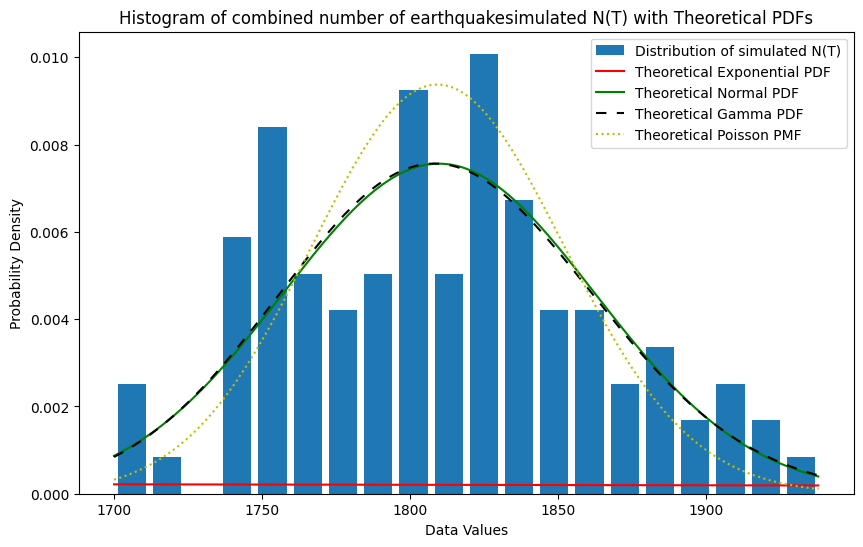

In [179]:
'''
Plotting the histogram of number of earthquakes that is combined from type 1 and type 2 simulated data and compare the fitted distribution of this to 4 probability distribution function:
Exponential distribution, Normal Distribution, Gamma Distribution, and Poisson distribution.
Then we check which distributions is a good fit to the distribution of number of earthquakes (N(T))
'''

# Using the method of moments the parameters for an Exponential, Normal, Gamma, and Poisson distribution are estimated
M1_NT_combine = sample_mean_NT_combine
M2_NT_combine = np.mean(np.square(sim_NT_combine))

# Initializing the Exponential Distribution
lamEst_NT_combine = 1 / M1_NT_combine # E[X] = 1 / lambda --> lambda = 1 / E[X]
estExpDist_NT_combine = stats.expon(scale=1/lamEst_NT_combine)

# Initializating the Normal Distribution
muEst_NT_combine = M1_NT_combine # mu = M1 (= estimation of x), E[X] = mu
sigmaEst_NT_combine = np.sqrt(M2_NT_combine - M1_NT_combine**2) # E[X**2] = sigma**2 + mu**2 -> sigma**2 = E[X**2] - mu**2
estNormDist_NT_combine = stats.norm(muEst_NT_combine, sigmaEst_NT_combine)

# Initializing the Gamma Distribution
# E[X] = alpha / beta, Var[X] = alpha / beta**2 -> E[X**2] = alpha(alpha + 1) / beta**2.
# M1 = alpha / beta, M2 = alpha(alpha + 1) / beta**2
alphaEst_NT_combine = M1_NT_combine**2 / (M2_NT_combine - M1_NT_combine**2) # Alpha is estimated as M1**2 / (M2 - M1**2)
betaEst_NT_combine = M1_NT_combine / (M2_NT_combine - M1_NT_combine**2) # Beta is estimated as M1 / (M2 - M1**2)
estGammaDist_NT_combine = stats.gamma(alphaEst_NT_combine, scale=1/betaEst_NT_combine)

# Initializing the Poisson Distribution
# E[X] = lambda
# Therefore, lambda could be estimated as M1
lamEst_Poi_NT_combine = M1_NT_combine
estPoisDist_NT_combine = stats.poisson(lamEst_Poi_NT_combine)

# Creating array serving as x-coordinates for plotting the theoretical PDF's/PMF
# Use of min() and max() to ensure that xs has the same range as sim_NT
xs_NT_combine_continuous = np.arange(min(sim_NT_combine), max(sim_NT_combine), 0.1) # for PDFs
xs_NT_combine_discrete = np.arange(min(sim_NT_combine), max(sim_NT_combine) + 1) # for PMF, using step size 1

# Visualising the distribution of N(T) together with the predefined distribution to check
# which distribution aligns the best with the distribution of the simulated data set
plt.figure(figsize=(10,6))
# Plot distribution of N(T) as a blue histogram
plt.hist(sim_NT_combine, rwidth = 0.8, bins=20, density=True, label = 'Distribution of simulated N(T)')
# # Plot the theoretical Exponential PDF as a solid red line
plt.plot(xs_NT_combine_continuous, estExpDist_NT_combine.pdf(xs_NT_combine_continuous), 'r', label = 'Theoretical Exponential PDF')
# Plot the theoretical Normal PDF as a solid green line
plt.plot(xs_NT_combine_continuous, estNormDist_NT_combine.pdf(xs_NT_combine_continuous), 'g', label = 'Theoretical Normal PDF')
# Plot the theoretical Gamma PDF as a dashed black line to make it clearer because it almost completely overlaps with the Normal PDF
plt.plot(xs_NT_combine_continuous, estGammaDist_NT_combine.pdf(xs_NT_combine_continuous), 'black', linestyle='--', dashes=(5,5), label = 'Theoretical Gamma PDF')
# Plot the theoretical Poisson PMF as a dotted yellow line
plt.plot(xs_NT_combine_discrete, estPoisDist_NT_combine.pmf(xs_NT_combine_discrete), 'y', linestyle=':', label = 'Theoretical Poisson PMF')
plt.title('Histogram of combined number of simulated earthquakes with Theoretical PDFs')
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

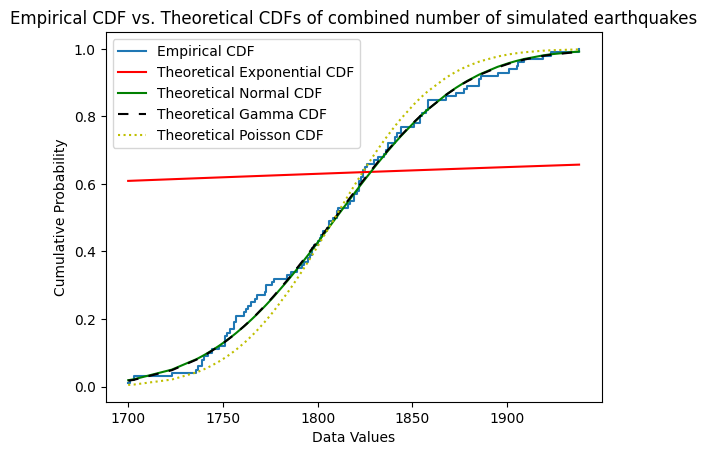

In [198]:
'''
Plotting the Empirical CDF of number of earthquakes that is combined from type 1 and type 2 simulated data and compare to 4 CDFs: 
Exponential distribution, Normal distribution, Gamma distribution, and Poisson distribution.
Then we check which distributions is a good fit to the emperical CDF of N(T)
'''

# Sorting is necessary for plotting a CDF. These sorted values are used as the x-coordinates for the step plot of the empirical CDF
xs2_NT_combine = np.sort(sim_NT_combine)
# ys is an array of cumulative probabilities and it matches the number of data points in x because it makes use of the len() function
# Each value in ys represent the portion of data points less than or equal to the corresponding value of xs2
ys_NT_combine = np.arange(1/len(sim_NT_combine), 1 + 1/len(sim_NT_combine), 1/len(sim_NT_combine))
# Empirical distribution sampling to visualise which distribution aligns the best with the distribution of the data set
# Plot the empirical CDF as a solid blue line
plt.step(xs2_NT_combine, ys_NT_combine, where='post', label = 'Empirical CDF')
# Plot the theoretical exponential CDF as a solid red line
plt.plot(xs2_NT_combine, estExpDist_NT_combine.cdf(xs2_NT_combine), 'r', label = 'Theoretical Exponential CDF')
# Plot the theoretical normal CDF as a solid green line
plt.plot(xs2_NT_combine, estNormDist_NT_combine.cdf(xs2_NT_combine), 'g', label = 'Theoretical Normal CDF')
# Plot the theoretical gamma CDF as a dashed black line to make it clearer
plt.plot(xs2_NT_combine, estGammaDist_NT_combine.cdf(xs2_NT_combine), 'black', linestyle='--', dashes=(5,5), label = 'Theoretical Gamma CDF')
# Plot the theoretical poisson CDF as a dotted yellow line 
plt.plot(xs2_NT_combine, estPoisDist_NT_combine.cdf(xs2_NT_combine), 'y', linestyle=':', label = 'Theoretical Poisson CDF')
plt.title('Empirical CDF vs. Theoretical CDFs of combined number of simulated earthquakes')
plt.xlabel('Data Values')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

In [181]:
# Perform the Kolmogorov-Smirnov test as a goodness of fit test for N(T)
# H0: the empirical distribution function tends to the chosen distribution function of N(T)
print("ktest Exp:", stats.kstest(sim_NT_combine, estExpDist_NT_combine.cdf))
print("ktest Norm:", stats.kstest(sim_NT_combine, estNormDist_NT_combine.cdf))
print("ktest Gamma:", stats.kstest(sim_NT_combine, estGammaDist_NT_combine.cdf))
print("ktest Poisson:", stats.kstest(sim_NT_combine, estPoisDist_NT_combine.cdf))

ktest Exp: KstestResult(statistic=np.float64(0.6091185938859706), pvalue=np.float64(3.874082221595468e-36), statistic_location=np.int64(1700), statistic_sign=np.int8(-1))
ktest Norm: KstestResult(statistic=np.float64(0.05709070351015416), pvalue=np.float64(0.8816289783956789), statistic_location=np.int64(1773), statistic_sign=np.int8(1))
ktest Gamma: KstestResult(statistic=np.float64(0.05553740313068714), pvalue=np.float64(0.9002711611408722), statistic_location=np.int64(1773), statistic_sign=np.int8(1))
ktest Poisson: KstestResult(statistic=np.float64(0.10389433104771309), pvalue=np.float64(0.21510356659945096), statistic_location=np.int64(1768), statistic_sign=np.int8(1))


## Method 2: Sampling over all earthquakes

### All earthquakes

In [182]:
# Simulate the number of earthquakes using the predefined function over a range of number of runs
sim_NT = [simEarthquakes(alphaEst, betaEst, T) for _ in range(nrRuns)]
# Calculate the sample mean of the simulation
sample_mean_NT = np.mean(sim_NT)
# Calculate the sample standard deviation of the simulation
sample_std_NT = np.std(sim_NT)

print(f'Mean N(T): {sample_mean_NT}')
print(f'Standard Deviation N(T): {sample_std_NT}')

# Create an confidence interval for the mean of N(T) using alpha = 0.05 resulting in a z-statistic of 1.96
# Since the standard deviation is unknown and replaced by a sample standard deviation should we actually use the t-statistic
# instead of the z-statistic. However, because we have so much data it is fine to use the z-statistic
halfwidth = 1.96 * sample_std_NT / np.sqrt(nrRuns)
print(f'Confidence interval mean N(T): {(sample_mean_NT - halfwidth, sample_mean_NT + halfwidth)}')
print(f'Confidence interval mean N(T): {sample_mean_NT} +/- {halfwidth}')

Mean N(T): 1798.78
Standard Deviation N(T): 48.693650510102444
Confidence interval mean N(T): (np.float64(1789.23604450002), np.float64(1808.32395549998))
Confidence interval mean N(T): 1798.78 +/- 9.543955499980079


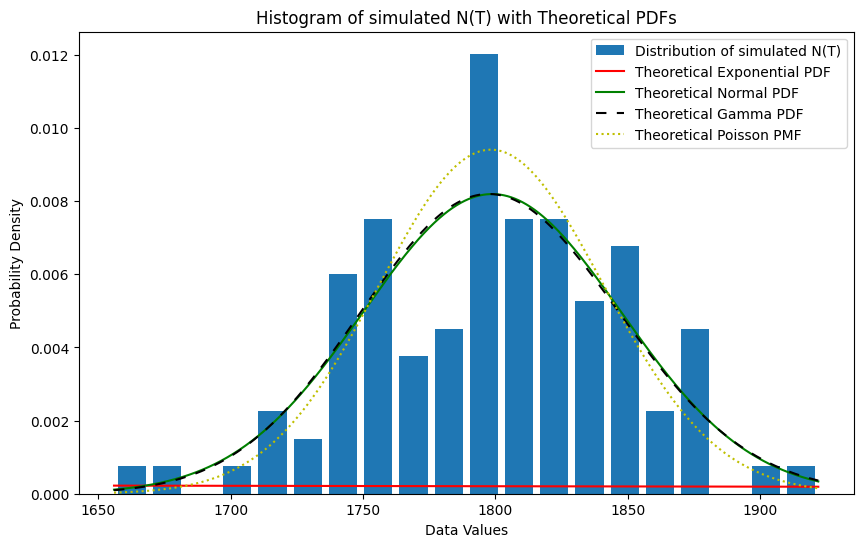

In [183]:
'''
Plotting the histogram of number of earthquakes and compare the fitted distribution of this to 4 probability distribution function:
Exponential distribution, Normal Distribution, Gamma Distribution, and Poisson distribution.
Then we check which distributions is a good fit to the distribution of number of earthquakes (N(T))
'''

# Using the method of moments the parameters for an Exponential, Normal, Gamma, and Poisson distribution are estimated
M1_NT = sample_mean_NT
M2_NT = np.mean(np.square(sim_NT))

# Initializing the Exponential Distribution
lamEst_NT = 1 / M1_NT # E[X] = 1 / lambda --> lambda = 1 / E[X]
estExpDist_NT = stats.expon(scale=1/lamEst_NT)

# Initializating the Normal Distribution
muEst_NT = M1_NT # mu = M1 (= estimation of x), E[X] = mu
sigmaEst_NT = np.sqrt(M2_NT - M1_NT**2) # E[X**2] = sigma**2 + mu**2 -> sigma**2 = E[X**2] - mu**2
estNormDist_NT = stats.norm(muEst_NT, sigmaEst_NT)

# Initializing the Gamma Distribution
# E[X] = alpha / beta, Var[X] = alpha / beta**2 -> E[X**2] = alpha(alpha + 1) / beta**2.
# M1 = alpha / beta, M2 = alpha(alpha + 1) / beta**2
alphaEst_NT = M1_NT**2 / (M2_NT - M1_NT**2) # Alpha is estimated as M1**2 / (M2 - M1**2)
betaEst_NT = M1_NT / (M2_NT - M1_NT**2) # Beta is estimated as M1 / (M2 - M1**2)
estGammaDist_NT = stats.gamma(alphaEst_NT, scale=1/betaEst_NT)

# Initializing the Poisson Distribution
# E[X] = lambda
# Therefore, lambda could be estimated as M1
lamEst_Poi_NT = M1_NT
estPoisDist_NT = stats.poisson(lamEst_Poi_NT)

# Creating array serving as x-coordinates for plotting the theoretical PDF's/PMF
# Use of min() and max() to ensure that xs has the same range as sim_NT
xs_NT_continuous = np.arange(min(sim_NT), max(sim_NT), 0.1) # for PDFs
xs_NT_discrete = np.arange(min(sim_NT), max(sim_NT) + 1) # for PMF, using step size 1

# Visualising the distribution of N(T) together with the predefined distribution to check
# which distribution aligns the best with the distribution of the simulated data set
plt.figure(figsize=(10,6))
# Plot distribution of N(T) as a blue histogram
plt.hist(sim_NT, rwidth = 0.8, bins=20, density=True, label = 'Distribution of simulated N(T)')
# Plot the theoretical Exponential PDF as a solid red line
plt.plot(xs_NT_continuous, estExpDist_NT.pdf(xs_NT_continuous), 'r', label = 'Theoretical Exponential PDF')
# Plot the theoretical Normal PDF as a solid green line
plt.plot(xs_NT_continuous, estNormDist_NT.pdf(xs_NT_continuous), 'g', label = 'Theoretical Normal PDF')
# Plot the theoretical Gamma PDF as a dashed black line to make it clearer because it almost completely overlaps with the Normal PDF
plt.plot(xs_NT_continuous, estGammaDist_NT.pdf(xs_NT_continuous), 'black', linestyle='--', dashes=(5,5), label = 'Theoretical Gamma PDF')
# Plot the theoretical Poisson PMF as a dotted yellow line
plt.plot(xs_NT_discrete, estPoisDist_NT.pmf(xs_NT_discrete), 'y', linestyle=':', label = 'Theoretical Poisson PMF')
plt.title('Histogram of simulated N(T) with Theoretical PDFs')
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

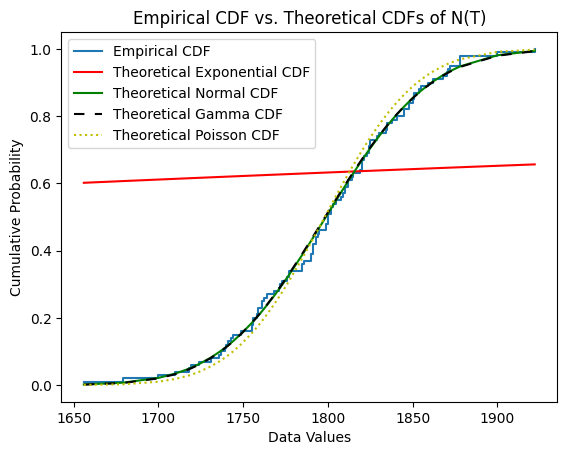

In [184]:
'''
Plotting the Empirical CDF of N(T) and compare to 4 CDFs: 
Exponential distribution, Normal distribution, Gamma distribution, and Poisson distribution.
Then we check which distributions is a good fit to the emperical CDF of N(T)
'''
# Sorting is necessary for plotting a CDF. These sorted values are used as the x-coordinates for the step plot of the empirical CDF
xs2_NT = np.sort(sim_NT)
# ys is an array of cumulative probabilities and it matches the number of data points in NrType1 because it makes use of the len() function
# Each value in ys represent the portion of data points less than or equal to the corresponding value of xs2
ys_NT = np.arange(1/len(sim_NT), 1 + 1/len(sim_NT), 1/len(sim_NT))
# Empirical distribution sampling to visualise which distribution aligns the best with the distribution of the simulated data set
# Plot the empirical CDF as a solid blue line
plt.step(xs2_NT, ys_NT, where='post', label = 'Empirical CDF')
# Plot the theoretical Exponential CDF as a solid red line
plt.plot(xs2_NT, estExpDist_NT.cdf(xs2_NT), 'r', label = 'Theoretical Exponential CDF')
# Plot the theoretical Normal CDF as a solid green line
plt.plot(xs2_NT, estNormDist_NT.cdf(xs2_NT), 'g', label = 'Theoretical Normal CDF')
# Plot the theoretical Gamma CDF as a dashed black line to make it clearer because it almost completely overlaps with the Normal CDF
plt.plot(xs2_NT, estGammaDist_NT.cdf(xs2_NT), 'black', linestyle='--', dashes=(5,5), label = 'Theoretical Gamma CDF')
# Plot the theoretical Poisson CDF as a dotted yellow line
plt.plot(xs2_NT, estPoisDist_NT.cdf(xs2_NT), 'y', linestyle=':', label = 'Theoretical Poisson CDF')
plt.title('Empirical CDF vs. Theoretical CDFs of N(T)')
plt.xlabel('Data Values')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

In [185]:
# Perform the Kolmogorov-Smirnov test as a goodness of fit test for N(T)
# H0: the empirical distribution function tends to the chosen distribution function of N(T)
print("ktest Exp:", stats.kstest(sim_NT, estExpDist_NT.cdf))
print("ktest Norm:", stats.kstest(sim_NT, estNormDist_NT.cdf))
print("ktest Gamma:", stats.kstest(sim_NT, estGammaDist_NT.cdf))
print("ktest Poisson:", stats.kstest(sim_NT, estPoisDist_NT.cdf))

ktest Exp: KstestResult(statistic=np.float64(0.6017295486533325), pvalue=np.float64(3.543489015575402e-35), statistic_location=np.int64(1656), statistic_sign=np.int8(-1))
ktest Norm: KstestResult(statistic=np.float64(0.05845421681339524), pvalue=np.float64(0.8640532619420561), statistic_location=np.int64(1790), statistic_sign=np.int8(-1))
ktest Gamma: KstestResult(statistic=np.float64(0.06188469183985518), pvalue=np.float64(0.8155017318955495), statistic_location=np.int64(1790), statistic_sign=np.int8(-1))
ktest Poisson: KstestResult(statistic=np.float64(0.0645015672187561), pvalue=np.float64(0.7751324744825616), statistic_location=np.int64(1845), statistic_sign=np.int8(-1))


### Calculated Number of Earthquakes using the Simulation and obtained Probability

In [201]:
# Function to calculate the number of type 1 and 2 earthquakes using the simulation of N(T) and probability of the obtained type 2 earthquake
def NrTypesEarthquakes(probType1, probType2, sim_NT):
    # Create lists for the number of type 1 and 2 earthquakes
    NrType1 = []
    NrType2 = []
    
    # For every simulated value of N(T) calculate the number of type 1 and 2 earthquakes and store it in the given lists
    for eq in sim_NT:
        NrType1.append(probType1 * eq)
        NrType2.append(probType2 * eq)
    
    # Return lists for the number of type 1 and 2 earthquakes
    return NrType1, NrType2

# The probability of a type 1 earthquake is 1 - the probability of a type 2 earthquake
probType1 = 1 - prob_type2
# Probability of a type 2 eathquakes, this was calculated earlier
probType2 = prob_type2

# Extract the two lists from the function
NrType1, NrType2 = NrTypesEarthquakes(probType1, probType2, sim_NT)

# Calculate the mean number of type 1 earthquakes
MeanType1 = np.mean(NrType1)
print(f'Mean N1(T): {MeanType1}')
# Calculate the standard deviation of number of type 1 earthquakes
StdType1 = np.std(NrType1)
print(f'Standard Deviation N1(T): {StdType1}')
# Create a confidence interval for the mean number of type 1 earthquakes
halfwidthType1 = 1.96 * StdType1 / np.sqrt(nrRuns)
print(f'Confidence interval mean N1(T): {(MeanType1 - halfwidthType1, MeanType1 + halfwidthType1)}')
print(f'Confidence interval mean N1(T): {MeanType1} +/- {halfwidthType1}')

# Calculate the mean number of type 2 earthquakes
MeanType2 = np.mean(NrType2)
print(f'Mean N2(T): {MeanType2}')
# Calculate the standard deviation of number of type 2 earthquakes
StdType2 = np.std(NrType2)
print(f'Standard Deviation N2(T): {StdType2}')
# Create a confidence interval for the mean number of type 2 earthquakes
halfwidthType2 = 1.96 * StdType2 / np.sqrt(nrRuns)
print(f'Confidence interval mean N2(T): {(MeanType2 - halfwidthType2, MeanType2 + halfwidthType2)}')
print(f'Confidence interval mean N2(T): {MeanType2} +/- {halfwidthType2}')

Mean N1(T): 183.02119000221194
Standard Deviation N1(T): 4.954452385456122
Confidence interval mean N1(T): (np.float64(182.05011733466253), np.float64(183.99226266976135))
Confidence interval mean N1(T): 183.02119000221194 +/- 0.9710726675493999
Mean N2(T): 1615.7588099977881
Standard Deviation N2(T): 43.739198124646315
Confidence interval mean N2(T): (np.float64(1607.1859271653575), np.float64(1624.3316928302188))
Confidence interval mean N2(T): 1615.7588099977881 +/- 8.572882832430677


#### Type 1 Earthquakes

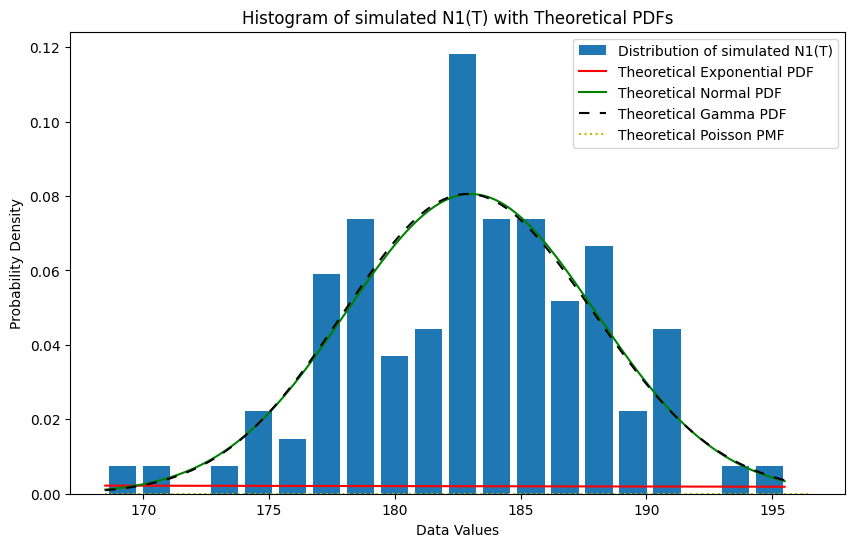

In [187]:
'''
Plotting the histogram of simulated number of type 1 earthquakes and compare the fitted distribution of this to 4 probability distribution function:
Exponential distribution, Normal Distribution, Gamma Distribution, and Poisson distribution.
Then we check which distributions is a good fit to the distribution of number of type 1 earthquakes (N1(T))
'''

# Using the method of moments the parameters for an Exponential, Normal, Gamma, and Poisson distribution are estimated
M1_NT_type1 = MeanType1
M2_NT_type1 = np.mean(np.square(NrType1))

# Initializing the Exponential Distribution
lamEst_NT_type1 = 1 / M1_NT_type1 # E[X] = 1 / lambda --> lambda = 1 / E[X]
estExpDist_NT_type1 = stats.expon(scale=1/lamEst_NT_type1)

# Initializating the Normal Distribution
muEst_NT_type1 = M1_NT_type1 # mu = M1 (= estimation of x), E[X] = mu
sigmaEst_NT_type1 = np.sqrt(M2_NT_type1 - M1_NT_type1**2) # E[X**2] = sigma**2 + mu**2 -> sigma**2 = E[X**2] - mu**2
estNormDist_NT_type1 = stats.norm(muEst_NT_type1, sigmaEst_NT_type1)

# Initializing the Gamma Distribution
# E[X] = alpha / beta, Var[X] = alpha / beta**2 -> E[X**2] = alpha(alpha + 1) / beta**2.
# M1 = alpha / beta, M2 = alpha(alpha + 1) / beta**2
alphaEst_NT_type1 = M1_NT_type1**2 / (M2_NT_type1 - M1_NT_type1**2) # Alpha is estimated as M1**2 / (M2 - M1**2)
betaEst_NT_type1 = M1_NT_type1 / (M2_NT_type1 - M1_NT_type1**2) # Beta is estimated as M1 / (M2 - M1**2)
estGammaDist_NT_type1 = stats.gamma(alphaEst_NT_type1, scale=1/betaEst_NT_type1)

# Initializing the Poisson Distribution
# E[X] = lambda
# Therefore, lambda could be estimated as M1
lamEst_Poi_NT_type1 = M1_NT_type1
estPoisDist_NT_type1 = stats.poisson(lamEst_Poi_NT_type1)

# Creating array serving as x-coordinates for plotting the theoretical PDF's/PMF
# Use of min() and max() to ensure that xs has the same range as NrType1
xs_NT_type1_continuous = np.arange(min(NrType1), max(NrType1), 0.1) # for PDFs
xs_NT_type1_discrete = np.arange(min(NrType1), max(NrType1) + 1) # for PMF, using step size 1

# Visualising the distribution of N1(T) together with the predefined distribution to check
# which distribution aligns the best with the distribution of the simulated data set
plt.figure(figsize=(10,6))
# Plot distribution of N1(T) as a blue histogram
plt.hist(NrType1, rwidth = 0.8, bins=20, density=True, label = 'Distribution of simulated N1(T)')
# Plot the theoretical Exponential PDF as a solid red line
plt.plot(xs_NT_type1_continuous, estExpDist_NT_type1.pdf(xs_NT_type1_continuous), 'r', label = 'Theoretical Exponential PDF')
# Plot the theoretical Normal PDF as a solid green line
plt.plot(xs_NT_type1_continuous, estNormDist_NT_type1.pdf(xs_NT_type1_continuous), 'g', label = 'Theoretical Normal PDF')
# Plot the theoretical Gamma PDF as a dashed black line to make it clearer because it almost completely overlaps with the Normal PDF
plt.plot(xs_NT_type1_continuous, estGammaDist_NT_type1.pdf(xs_NT_type1_continuous), 'black', linestyle='--', dashes=(5,5), label = 'Theoretical Gamma PDF')
# Plot the theoretical Poisson PMF as a dotted yellow line
plt.plot(xs_NT_type1_discrete, estPoisDist_NT_type1.pmf(xs_NT_type1_discrete), 'y', linestyle=':', label = 'Theoretical Poisson PMF')
plt.title('Histogram of simulated N1(T) with Theoretical PDFs')
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [204]:
estPoisDist_NT_type1

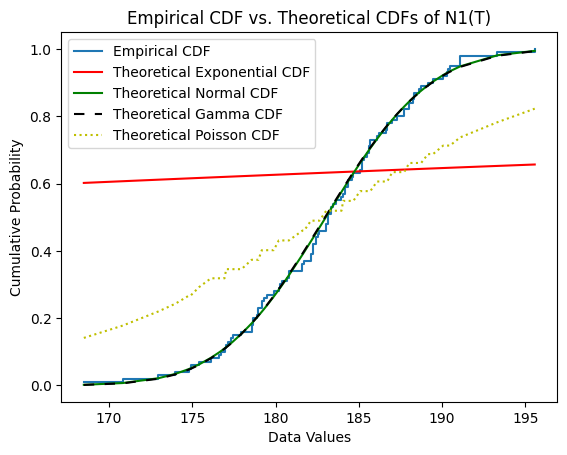

In [188]:
'''
Plotting the Empirical CDF of N1(T) and compare to 4 CDFs: 
Exponential distribution, Normal distribution, Gamma distribution, and Poisson distribution.
Then we check which distributions is a good fit to the emperical CDF of N1(T)
'''
# Sorting is necessary for plotting a CDF. These sorted values are used as the x-coordinates for the step plot of the empirical CDF
xs2_NT_type1 = np.sort(NrType1)
# ys is an array of cumulative probabilities and it matches the number of data points in NrType1 because it makes use of the len() function
# Each value in ys represent the portion of data points less than or equal to the corresponding value of xs2
ys_NT_type1 = np.arange(1/len(NrType1), 1 + 1/len(NrType1), 1/len(NrType1))
# Empirical distribution sampling to visualise which distribution aligns the best with the distribution of the simulated data set
# Plot the empirical CDF as a solid blue line
plt.step(xs2_NT_type1, ys_NT_type1, where='post', label = 'Empirical CDF')
# Plot the theoretical Exponential CDF as a solid red line
plt.plot(xs2_NT_type1, estExpDist_NT_type1.cdf(xs2_NT_type1), 'r', label = 'Theoretical Exponential CDF')
# Plot the theoretical Normal CDF as a solid green line
plt.plot(xs2_NT_type1, estNormDist_NT_type1.cdf(xs2_NT_type1), 'g', label = 'Theoretical Normal CDF')
# Plot the theoretical Gamma CDF as a dashed black line to make it clearer because it almost completely overlaps with the Normal CDF
plt.plot(xs2_NT_type1, estGammaDist_NT_type1.cdf(xs2_NT_type1), 'black', linestyle='--', dashes=(5,5), label = 'Theoretical Gamma CDF')
# Plot the theoretical Poisson CDF as a dotted yellow line
plt.plot(xs2_NT_type1, estPoisDist_NT_type1.cdf(xs2_NT_type1), 'y', linestyle=':', label = 'Theoretical Poisson CDF')
plt.title('Empirical CDF vs. Theoretical CDFs of N1(T)')
plt.xlabel('Data Values')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

In [189]:
# Perform the Kolmogorov-Smirnov test as a goodness of fit test for N1(T)
# H0: the empirical distribution function tends to the chosen distribution function of N1(T)
print("ktest Exp:", stats.kstest(NrType1, estExpDist_NT_type1.cdf))
print("ktest Norm:", stats.kstest(NrType1, estNormDist_NT_type1.cdf))
print("ktest Gamma:", stats.kstest(NrType1, estGammaDist_NT_type1.cdf))
print("ktest Poisson:", stats.kstest(NrType1, estPoisDist_NT_type1.cdf))

ktest Exp: KstestResult(statistic=np.float64(0.6017295486533326), pvalue=np.float64(3.5434890155752866e-35), statistic_location=np.float64(168.493696084937), statistic_sign=np.int8(-1))
ktest Norm: KstestResult(statistic=np.float64(0.05845421681339069), pvalue=np.float64(0.8640532619421165), statistic_location=np.float64(182.12784782127852), statistic_sign=np.int8(-1))
ktest Gamma: KstestResult(statistic=np.float64(0.06188469183985251), pvalue=np.float64(0.8155017318955893), statistic_location=np.float64(182.12784782127852), statistic_sign=np.int8(-1))
ktest Poisson: KstestResult(statistic=np.float64(0.24827215981919515), pvalue=np.float64(6.4626192144695665e-06), statistic_location=np.float64(176.12475116124756), statistic_sign=np.int8(-1))


#### Type 2 Earthquakes

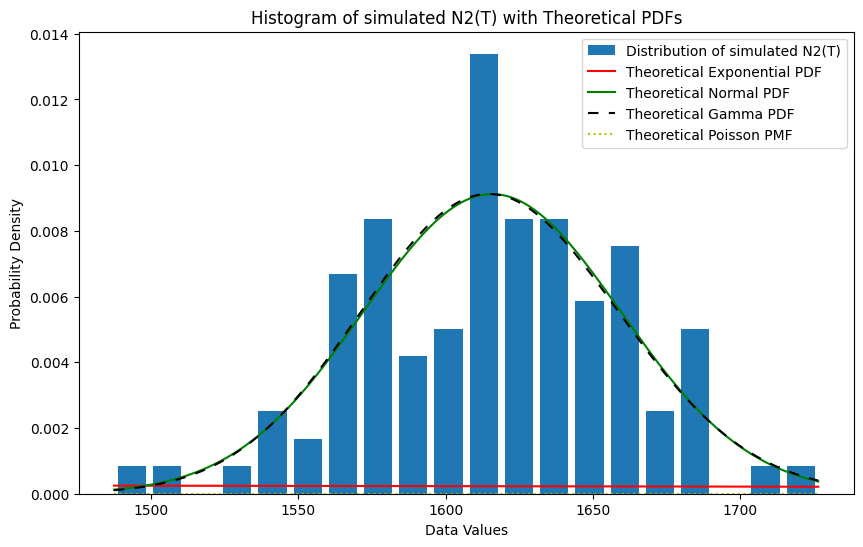

In [199]:
'''
Plotting the histogram of simulated number of type 2 earthquakes and compare the fitted distribution of this to 4 probability distribution function:
Exponential distribution, Normal Distribution, Gamma Distribution, and Poisson distribution.
Then we check which distributions is a good fit to the distribution of number of type 2 earthquakes (N2(T))
'''

# Using the method of moments the parameters for an Exponential, Normal, Gamma, and Poisson distribution are estimated
M1_NT_type2 = MeanType2
M2_NT_type2 = np.mean(np.square(NrType2))

# Initializing the Exponential Distribution
lamEst_NT_type2 = 1 / M1_NT_type2 # E[X] = 1 / lambda --> lambda = 1 / E[X]
estExpDist_NT_type2 = stats.expon(scale=1/lamEst_NT_type2)

# Initializating the Normal Distribution
muEst_NT_type2 = M1_NT_type2 # mu = M1 (= estimation of x), E[X] = mu
sigmaEst_NT_type2 = np.sqrt(M2_NT_type2 - M1_NT_type2**2) # E[X**2] = sigma**2 + mu**2 -> sigma**2 = E[X**2] - mu**2
estNormDist_NT_type2 = stats.norm(muEst_NT_type2, sigmaEst_NT_type2)

# Initializing the Gamma Distribution
# E[X] = alpha / beta, Var[X] = alpha / beta**2 -> E[X**2] = alpha(alpha + 1) / beta**2.
# M1 = alpha / beta, M2 = alpha(alpha + 1) / beta**2
alphaEst_NT_type2 = M1_NT_type2**2 / (M2_NT_type2 - M1_NT_type2**2) # Alpha is estimated as M1**2 / (M2 - M1**2)
betaEst_NT_type2 = M1_NT_type2 / (M2_NT_type2 - M1_NT_type2**2) # Beta is estimated as M1 / (M2 - M1**2)
estGammaDist_NT_type2 = stats.gamma(alphaEst_NT_type2, scale=1/betaEst_NT_type2)

# Initializing the Poisson Distribution
# E[X] = lambda
# Therefore, lambda could be estimated as M1
lamEst_Poi_NT_type2 = M1_NT_type2
estPoisDist_NT_type2 = stats.poisson(lamEst_Poi_NT_type2)

# Creating array serving as x-coordinates for plotting the theoretical PDF's/PMF
# Use of min() and max() to ensure that xs has the same range as NrType2
xs_NT_type2_continuous = np.arange(min(NrType2), max(NrType2), 0.1) # for PDFs
xs_NT_type2_discrete = np.arange(min(NrType2), max(NrType2) + 1) # for PMF, using step size 1

# Visualising the distribution of N2(T) together with the predefined distribution to check
# which distribution aligns the best with the distribution of the simulated data set
plt.figure(figsize=(10,6))
# Plot distribution of N2(T) as a blue histogram
plt.hist(NrType2, rwidth = 0.8, bins=20, density=True, label = 'Distribution of simulated N2(T)')
# Plot the theoretical Exponential PDF as a solid red line
plt.plot(xs_NT_type2_continuous, estExpDist_NT_type2.pdf(xs_NT_type2_continuous), 'r', label = 'Theoretical Exponential PDF')
# Plot the theoretical Normal PDF as a solid green line
plt.plot(xs_NT_type2_continuous, estNormDist_NT_type2.pdf(xs_NT_type2_continuous), 'g', label = 'Theoretical Normal PDF')
# Plot the theoretical Gamma PDF as a dashed black line to make it clearer because it almost completely overlaps with the Normal PDF
plt.plot(xs_NT_type2_continuous, estGammaDist_NT_type2.pdf(xs_NT_type2_continuous), 'black', linestyle='--', dashes=(5,5), label = 'Theoretical Gamma PDF')
# Plot the theoretical Poisson PMF as a dotted yellow line
plt.plot(xs_NT_type2_discrete, estPoisDist_NT_type2.pmf(xs_NT_type2_discrete), 'y', linestyle=':', label = 'Theoretical Poisson PMF')
plt.title('Histogram of simulated N2(T) with Theoretical PDFs')
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

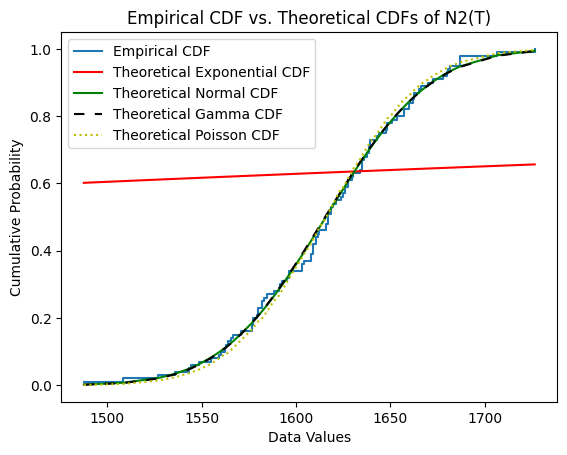

In [191]:
'''
Plotting the Empirical CDF of N2(T) and compare to 4 CDFs: 
Exponential distribution, Normal distribution, Gamma distribution, and Poisson distribution.
Then we check which distributions is a good fit to the emperical CDF of N2(T)
'''
# Sorting is necessary for plotting a CDF. These sorted values are used as the x-coordinates for the step plot of the empirical CDF
xs2_NT_type2 = np.sort(NrType2)
# ys is an array of cumulative probabilities and it matches the number of data points in NrType2 because it makes use of the len() function
# Each value in ys represent the portion of data points less than or equal to the corresponding value of xs2
ys_NT_type2 = np.arange(1/len(NrType2), 1 + 1/len(NrType2), 1/len(NrType2))
# Empirical distribution sampling to visualise which distribution aligns the best with the distribution of the simulated data set
# Plot the empirical CDF as a solid blue line
plt.step(xs2_NT_type2, ys_NT_type2, where='post', label = 'Empirical CDF')
# Plot the theoretical Exponential CDF as a solid red line
plt.plot(xs2_NT_type2, estExpDist_NT_type2.cdf(xs2_NT_type2), 'r', label = 'Theoretical Exponential CDF')
# Plot the theoretical Normal CDF as a solid green line
plt.plot(xs2_NT_type2, estNormDist_NT_type2.cdf(xs2_NT_type2), 'g', label = 'Theoretical Normal CDF')
# Plot the theoretical Gamma CDF as a dashed black line to make it clearer because it almost completely overlaps with the Normal and Poisson CDF
plt.plot(xs2_NT_type2, estGammaDist_NT_type2.cdf(xs2_NT_type2), 'black', linestyle='--', dashes=(5,5), label = 'Theoretical Gamma CDF')
# Plot the theoretical Poisson CDF as a dotted yellow line to make it clearer because it almost completely overlaps with the Normal and Gamma CDF
plt.plot(xs2_NT_type2, estPoisDist_NT_type2.cdf(xs2_NT_type2), 'y', linestyle=':', label = 'Theoretical Poisson CDF')
plt.title('Empirical CDF vs. Theoretical CDFs of N2(T)')
plt.xlabel('Data Values')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

In [192]:
# Perform the Kolmogorov-Smirnov test as a goodness of fit test for N2(T)
# H0: the empirical distribution function tends to the chosen distribution function of N2(T)
print("ktest Exp:", stats.kstest(NrType2, estExpDist_NT_type2.cdf))
print("ktest Norm:", stats.kstest(NrType2, estNormDist_NT_type2.cdf))
print("ktest Gamma:", stats.kstest(NrType2, estGammaDist_NT_type2.cdf))
print("ktest Poisson:", stats.kstest(NrType2, estPoisDist_NT_type2.cdf))

ktest Exp: KstestResult(statistic=np.float64(0.6017295486533326), pvalue=np.float64(3.5434890155752866e-35), statistic_location=np.float64(1487.506303915063), statistic_sign=np.int8(-1))
ktest Norm: KstestResult(statistic=np.float64(0.05845421681338797), pvalue=np.float64(0.8640532619421527), statistic_location=np.float64(1607.8721521787215), statistic_sign=np.int8(-1))
ktest Gamma: KstestResult(statistic=np.float64(0.06188469183984474), pvalue=np.float64(0.8155017318957055), statistic_location=np.float64(1607.8721521787215), statistic_sign=np.int8(-1))
ktest Poisson: KstestResult(statistic=np.float64(0.055628524432476595), pvalue=np.float64(0.8992202908729416), statistic_location=np.float64(1582.7210794072107), statistic_sign=np.int8(1))


## Second distribution for Simulating Type 1 Earthquakes

In [193]:
T = 365*24*60 # Simulation is done for next year and is converted to minutes for the simulation

def simEarthquakes_expon(lam, T):
    Nt = 0 # Counting the number of earthquakes
    # Distribution for the inter arrival times between earthquakes. 
    # This time a exponential distribution will be used
    interArrDist_expon = stats.expon(scale=1/lam) 
    t_expon = interArrDist_expon.rvs() # Time variable
    
    # The simulation is done for one year, so as long as the time variable is smaller than one year the simulation will continue
    while t_expon < T:
        Nt += 1 # An earthquake occured, so counter raised by one
        t_expon += interArrDist_expon.rvs() # Time variable is raised by the inter arrival time, which distribution is defined above
        
    return Nt # Return the number of earthquakes that occured in the next year (365 days)

In [194]:
sim_expon = [simEarthquakes_expon(lamEst_type1, T) for _ in range(nrRuns)]
sample_mean_expon = np.mean(sim_expon)
sample_std_expon = np.std(sim_expon)

print(f'Mean N1(NT) for inter arrival times Exponentially distributed: {sample_mean_expon}')
print(f'Standard Deviation of the Exponetially simulated inter arrival times for N1(T): {sample_std_expon}')

# Create an confidence interval for the mean of N1(T) using alpha = 0.05 resulting in a z-statistic of 1.96
# Since the standard deviation is unknown and replaced by a sample standard deviation should we actually use the t-statistic
# instead of the z-statistic. However, because we have so much data it is fine to use the z-statistic
halfwidth_expon = 1.96 * sample_std_expon / np.sqrt(nrRuns)
print(f'Confidence interval mean N1(T): {(sample_mean_expon - halfwidth_expon, sample_mean_expon + halfwidth_expon)}')
print(f'Confidence interval mean N1(T): {sample_mean_expon} +/- {halfwidth_type1}')

Mean N1(NT) for inter arrival times Exponentially distributed: 184.08
Standard Deviation of the Exponetially simulated inter arrival times for N1(T): 13.81352959963528
Confidence interval mean N1(T): (np.float64(181.3725481984715), np.float64(186.78745180152853))
Confidence interval mean N1(T): 184.08 +/- 2.997828810055704


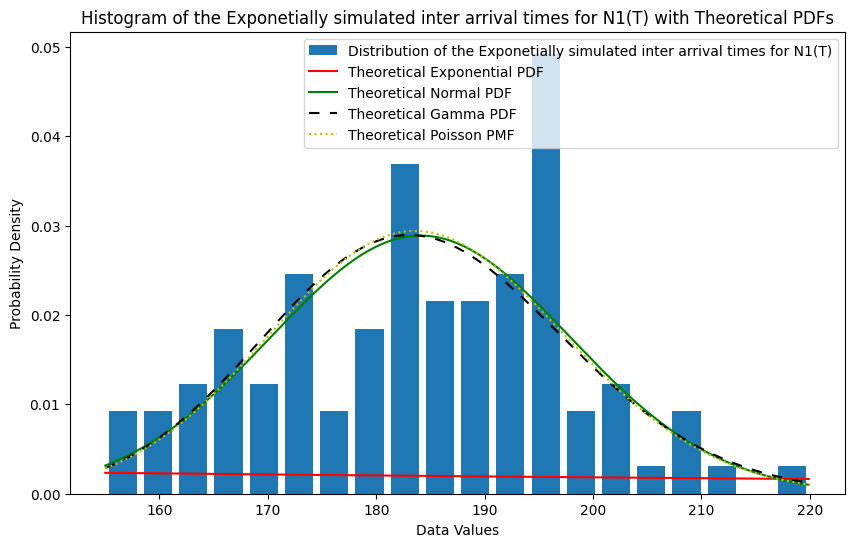

In [195]:
'''
Plotting the histogram of the Exponetially simulated inter arrival times for type 1 earthquakes and compare the fitted distribution of this to 4 probability distribution function:
Exponential distribution, Normal Distribution, Gamma Distribution, and Poisson distribution.
Then we check which distributions is a good fit to the distribution of number of type 1 earthquakes (N1(T))
'''

# Using the method of moments the parameters for an exponential, normal, and gamma distribution are estimated
M1_expon = sample_mean_expon
M2_expon = np.mean(np.square(sim_expon))

# Initializing the Exponential Distribution
lamEst_expon = 1 / M1_expon # lambda = 1 / E[X], formula of lambda
estExpDist_expon = stats.expon(scale=1/lamEst_expon)

# Initializating the Normal Distribution
muEst_expon = M1_expon # mu = M1 (= estimation of x), E[X] = mu
sigmaEst_expon = np.sqrt(M2_expon - M1_expon**2) # E[X**2] = sigma**2 + mu**2 -> sigma**2 = E[X**2] - mu**2
estNormDist_expon = stats.norm(muEst_expon, sigmaEst_expon)

# Initializing the Gamma Distribution
# E[X] = alpha / beta, Var[X] = alpha / beta**2 -> E[X**2] = alpha(alpha + 1) / beta**2.
# M1 = alpha / beta, M2 = alpha(alpha + 1) / beta**2
alphaEst_expon = M1_expon**2 / (M2_expon - M1_expon**2) # Alpha is estimated as M1**2 / (M2 - M1**2)
betaEst_expon = M1_expon / (M2_expon- M1_expon**2) # Beta is estimated as M1 / (M2 - M1**2)
estGammaDist_expon = stats.gamma(alphaEst_expon, scale=1/betaEst_expon)

# Initializing the Poisson Distribution
# E[X] = lambda
# Therefore, lambda could be estimated as M1
lamEst_expon = M1_expon
estPoisDist_expon = stats.poisson(lamEst_expon)

# Creating array serving as x-coordinates for plotting the theoretical PDF's/PMF
# Use of min() and max() to ensure that xs has the same range as NrType2
xs_expon_continuous = np.arange(min(sim_expon), max(sim_expon), 0.1) # for PDFs
xs_expon_discrete = np.arange(min(sim_expon), max(sim_expon) + 1) # for PMF, using step size 1

# Visualising the distribution of N1(T) together with the predefined distribution to check
# which distribution aligns the best with the distribution of the data set
plt.figure(figsize=(10,6))
# Plot distribution of N1(T) as a blue histogram
plt.hist(sim_expon, rwidth = 0.8, bins=20, density=True, label = 'Distribution of the Exponetially simulated inter arrival times for N1(T)')
# Plot the theoretical Exponential PDF as a solid red line
plt.plot(xs_expon_continuous, estExpDist_expon.pdf(xs_expon_continuous), 'r', label = 'Theoretical Exponential PDF')
# Plot the theoretical Normal PDF as a solid green line
plt.plot(xs_expon_continuous, estNormDist_expon.pdf(xs_expon_continuous), 'g', label = 'Theoretical Normal PDF')
# Plot the theoretical Gamma PDF as a dashed black line
plt.plot(xs_expon_continuous, estGammaDist_expon.pdf(xs_expon_continuous), 'black', linestyle='--', dashes=(5, 5), label = 'Theoretical Gamma PDF')
# Plot the theoretical Poisson PMF as a dotted yellow line
plt.plot(xs_expon_discrete, estPoisDist_expon.pmf(xs_expon_discrete), 'y', linestyle=':', label = 'Theoretical Poisson PMF')
plt.title('Histogram of the Exponetially simulated inter arrival times for N1(T) with Theoretical PDFs')
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

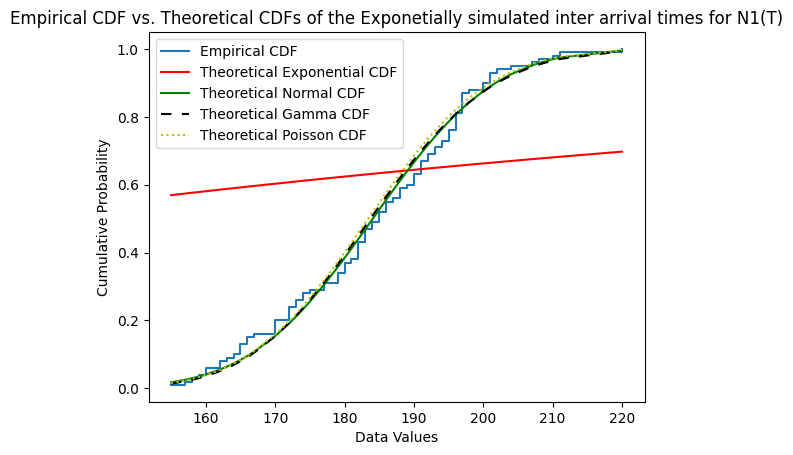

In [196]:
'''
Plotting the Empirical CDF of the Exponetially simulated inter arrival times for N1(T) and compare to 4 CDFs: 
Exponential distribution, Normal distribution, Gamma distribution, and Poisson distribution.
Then we check which distributions is a good fit to the emperical CDF of N1(T)
'''
# Sorting is necessary for plotting a CDF. These sorted values are used as the x-coordinates for the step plot of the empirical CDF
xs2_expon = np.sort(sim_expon)
# ys is an array of cumulative probabilities and it matches the number of data points in x because it makes use of the len(x) function
# Each value in ys represent the portion of data points less than or equal to the corresponding value of xs2
ys_expon = np.arange(1/len(sim_expon), 1 + 1/len(sim_expon), 1/len(sim_expon))
# Empirical distribution sampling to visualise which distribution aligns the best with the distribution of the data set
# Plot the empirical CDF as a solid blue line
plt.step(xs2_expon, ys_expon, where='post', label = 'Empirical CDF')
# Plot the theoretical exponential CDF as a solid red line
plt.plot(xs2_expon, estExpDist_expon.cdf(xs2_expon), 'r', label = 'Theoretical Exponential CDF')
# Plot the theoretical normal CDF as a solid green line
plt.plot(xs2_expon, estNormDist_expon.cdf(xs2_expon), 'g', label = 'Theoretical Normal CDF')
# Plot the theoretical gamma CDF as a dashed black line to make it clearer
plt.plot(xs2_expon, estGammaDist_expon.cdf(xs2_expon), 'black', linestyle='--', dashes=(5,5), label = 'Theoretical Gamma CDF')
# Plot the theoretical poisson CDF as a dotted yellow line 
plt.plot(xs2_expon, estPoisDist_expon.cdf(xs2_expon), 'y', linestyle=':', label = 'Theoretical Poisson CDF')
plt.title('Empirical CDF vs. Theoretical CDFs of the Exponetially simulated inter arrival times for N1(T)')
plt.xlabel('Data Values')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

In [197]:
# Perform the Kolmogorov-Smirnov test as a goodness of fit test for N1(T) for inter arrival times Exponentially distributed
# H0: the empirical distribution function tends to the chosen distribution function of N1(T)
print("ktest Exp:", stats.kstest(sim_expon, estExpDist_expon.cdf))
print("ktest Norm:", stats.kstest(sim_expon, estNormDist_expon.cdf))
print("ktest Gamma:", stats.kstest(sim_expon, estGammaDist_expon.cdf))
print("ktest Poisson:", stats.kstest(sim_expon, estPoisDist_expon.cdf))

ktest Exp: KstestResult(statistic=np.float64(0.5691628947751183), pvalue=np.float64(3.7566367225599586e-31), statistic_location=np.int64(155), statistic_sign=np.int8(-1))
ktest Norm: KstestResult(statistic=np.float64(0.06588021299531888), pvalue=np.float64(0.7530061036024024), statistic_location=np.int64(190), statistic_sign=np.int8(-1))
ktest Gamma: KstestResult(statistic=np.float64(0.07328637794455672), pvalue=np.float64(0.6291782768199994), statistic_location=np.int64(190), statistic_sign=np.int8(-1))
ktest Poisson: KstestResult(statistic=np.float64(0.08534418112117215), pvalue=np.float64(0.43599589565728436), statistic_location=np.int64(190), statistic_sign=np.int8(-1))
